<table align="center" width=100%>
    <tr>
        <td width="40%">
            <img src="skincare.jpeg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=120px>
                    <b>Skin Care Recommendation
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Dataset

https://raw.githubusercontent.com/agorina91/final_project/master/Jupyter_Notebook_and_CSV/skindataall.csv

# Problem Statement 

**To build different recommendation models for the given skincare dataset.**

# Data Dictionary


**1 - Username** : Username of the consumer 

**2 - Skin_Tone** : Shade of the consumer's skin

**3 - Skin_Type** : Type of the consumer's skin

**4 - Eye_Color** : Color of the consumer's eyes

**5 - Hair_Color** : Color of the consumers hair

**6 - Rating_Stars** : Rating assigned by the consumer (between 1 and 5)

**7 - Review** : Product Review given by the consumer

**8 - Product** : Name of the product

**9 - Brand** : Brand which manufactures the product 

**10 - Price** : Price of the product

**11 - Rating** : Average rating of the product (between 0 and 5)

**12 - Ingredients** : Ingredients present in the product

**13 - Combination** : Whether the product is for combination type of skin

**14 - Dry** : Whether the product is for dry type of skin

**15 - Normal** : Whether the product is for normal type of skin

**16 - Oily** : Whether the product is for oily type of skin

**17 - Sensitive** : Whether the product is for sensitive type of skin

**18 - Category** : Type of the product

**19 - Product_Url** : Website address for online purchase of the product

**20 - User_id** : User ID of the consumer

**21 - Product_id** : Product ID listed by the website

**22 - Ingredients_Cleaned** : Ingredients present in the product, mentioned as tags

**23 - Review_Cleaned** : Product review given by customer, mentioned as tags

**24 - Good_Stuff** : Whether the consumer rated the product positively or not

**25 - Ing_Tfidf** : Ingredients present in the product, unlisted as tags

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Exploratory Data Analysis](#data_preparation)**
    - 4.1 - [Preparing the Dataset](#Data_Preparing)
        - 4.1.1 - [Data Dimension](#Data_Shape)
        - 4.1.2 - [Data Types](#Data_Types)
        - 4.1.3 - [Missing Values](#Missing_Values)
        - 4.1.4 - [Data Cleaning](#data_clean)
        - 4.1.5 - [Final Dataset](#final_dataset)
    - 4.2 - [Understanding the Dataset](#Data_Understanding)
        - 4.2.1 - [Summary Statistics](#Summary_Statistics)
        - 4.2.2 - [Correlation](#correlation)
        - 4.2.3 - [Insights from the data](#insights)
        - 4.2.4 - [Creating a separate dataset for building recommendation system](#rec)
5. **[Data Preprocessing](#preprocessing)**
    - 5.1 - [Feature Scaling](#feat_scaling)
6. **[KMeans](#kmeans)**
7. **[Memory Based Recommender](#memory)**
    - 7.1 - [Using KNN](#use_knn)
    - 7.2 - [Using SVD](#use_svd)
8. **[Model Based Collaborative Filtering](#model_cf)**
9. **[Content Based Recommendation System](#content)**
10. **[Hybrid Recommender](#hybrid)**
11. **[Popularity Recommendation System](#pop)**
12. **[Conclusion](#concl)**
13. **[References](#Refer)**

# 1. Import Libraries <a id='import_lib'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from surprise import Reader, SVD, Dataset
from surprise.model_selection import cross_validate
from sklearn.neighbors import NearestNeighbors
from mlxtend.frequent_patterns import apriori,association_rules
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.decomposition import TruncatedSVD

# 2. Set Options <a id='set_options'></a>

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')
# display all columns of the dataframe
pd.options.display.max_columns = None
# display all rows of the dataframe
pd.options.display.max_rows = None
# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

# 3. Read Data <a id='Read_Data'></a>

In [3]:
df = pd.read_csv('skindataall.csv')
df = df.drop('Unnamed: 0',axis=1)
df.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
1      PatTea    Medium  Combination     Brown        Red             1   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
1  Unfortunately this doesn’t work for everyone. ...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   

                          Product                Brand  Price   Rating  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   

                                         Ingredients  Combination  Dry  \
0  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
1  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
2  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
3  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
4  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   

   Normal  Oily  Sensitive  Category  \
0       0     0          0  Cleanser   
1       0     0          0  Cleanser   
2       0     0          0  Cleanser   
3       0     0          0  Cleanser   
4       0     0          0  Cleanser   

                                         Product_Url  User_id  Product_id  \
0  https://www.sephora.com/product/kale-spinach-g...     3420         157   
1  https://www.sephora.com/product/kale-spinach-g...     2483         157   
2  https://www.sephora.com/product/kale-spinach-g...     2715         157   
3  https://www.sephora.com/product/kale-spinach-g...     4497         157   
4  https://www.sephora.com/product/kale-spinach-g...     5017         157   

                                 Ingredients_Cleaned  \
0  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
1  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
2  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
3  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
4  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   

                                      Review_Cleaned  Good_Stuff  \
0  ['hand', 'best', 'cleanser', 'ever', 'used', '...           1   
1  ['unfortunately', 'work', 'everyone', 'used', ...           0   
2  ['favorite', 'cleanser', 'love', 'packaging', ...           1   
3  ['love', 'thing', 'youth', 'people', 'cleanser...           1   
4  ['trial', 'size', 'wa', 'obsessed', 'skin', 'f...           1   

                                           Ing_Tfidf  
0  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
1  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
2  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
3  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
4  sodium, cocoyl, glutamate, cocamidopropyl, bet...

# 4. Exploratory Data Analysis <a id='data_preparation'></a>

## 4.1 Preparing the Dataset <a id='Data_Preparing'></a>

### 4.1.1 Data Dimensions <a id='Data_Shape'></a>

In [4]:
df.shape

(8649, 25)

In this dataset, we have 8649 records across 25 features.

### 4.1.2 Data Types <a id='Data_Types'></a>

In [5]:
df.dtypes

Username                object
Skin_Tone               object
Skin_Type               object
Eye_Color               object
Hair_Color              object
Rating_Stars             int64
Review                  object
Product                 object
Brand                   object
Price                    int64
Rating                 float64
Ingredients             object
Combination              int64
Dry                      int64
Normal                   int64
Oily                     int64
Sensitive                int64
Category                object
Product_Url             object
User_id                  int64
Product_id               int64
Ingredients_Cleaned     object
Review_Cleaned          object
Good_Stuff               int64
Ing_Tfidf               object
dtype: object

This dataset contains **10 int columns, 1 float column and 14 object columns.**

### 4.1.3 Missing Values <a id='Missing_Values'></a>

In [6]:
df.isnull().sum()

Username               0
Skin_Tone              0
Skin_Type              0
Eye_Color              0
Hair_Color             0
Rating_Stars           0
Review                 0
Product                0
Brand                  0
Price                  0
Rating                 0
Ingredients            0
Combination            0
Dry                    0
Normal                 0
Oily                   0
Sensitive              0
Category               0
Product_Url            0
User_id                0
Product_id             0
Ingredients_Cleaned    0
Review_Cleaned         0
Good_Stuff             0
Ing_Tfidf              0
dtype: int64

There are **no missing values** present in this dataset

**Visualising missing values using Heatmap**

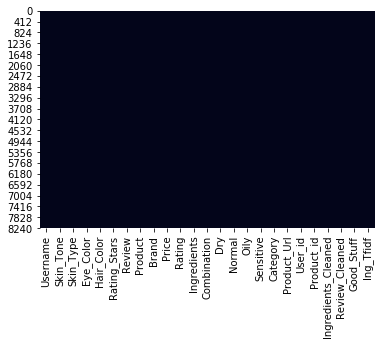

In [7]:
sns.heatmap(df.isnull(),cbar=False)

**Graphical proof that there are no missing values**

In [8]:
print('Total number of users :',df['User_id'].nunique())
print('Total number of unique products:',df['Product'].nunique())

Total number of users : 6851
Total number of unique products: 315


### 4.1.4 Data Cleaning  <a id='data_clean'></a>

In [9]:
df.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
1      PatTea    Medium  Combination     Brown        Red             1   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
1  Unfortunately this doesn’t work for everyone. ...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   

                          Product                Brand  Price   Rating  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   

                                         Ingredients  Combination  Dry  \
0  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
1  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
2  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
3  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
4  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   

   Normal  Oily  Sensitive  Category  \
0       0     0          0  Cleanser   
1       0     0          0  Cleanser   
2       0     0          0  Cleanser   
3       0     0          0  Cleanser   
4       0     0          0  Cleanser   

                                         Product_Url  User_id  Product_id  \
0  https://www.sephora.com/product/kale-spinach-g...     3420         157   
1  https://www.sephora.com/product/kale-spinach-g...     2483         157   
2  https://www.sephora.com/product/kale-spinach-g...     2715         157   
3  https://www.sephora.com/product/kale-spinach-g...     4497         157   
4  https://www.sephora.com/product/kale-spinach-g...     5017         157   

                                 Ingredients_Cleaned  \
0  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
1  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
2  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
3  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
4  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   

                                      Review_Cleaned  Good_Stuff  \
0  ['hand', 'best', 'cleanser', 'ever', 'used', '...           1   
1  ['unfortunately', 'work', 'everyone', 'used', ...           0   
2  ['favorite', 'cleanser', 'love', 'packaging', ...           1   
3  ['love', 'thing', 'youth', 'people', 'cleanser...           1   
4  ['trial', 'size', 'wa', 'obsessed', 'skin', 'f...           1   

                                           Ing_Tfidf  
0  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
1  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
2  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
3  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
4  sodium, cocoyl, glutamate, cocamidopropyl, bet...

In [10]:
df1=df.copy()

In [11]:
df.columns

Index(['Username', 'Skin_Tone', 'Skin_Type', 'Eye_Color', 'Hair_Color',
       'Rating_Stars', 'Review', 'Product', 'Brand', 'Price', 'Rating',
       'Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive',
       'Category', 'Product_Url', 'User_id', 'Product_id',
       'Ingredients_Cleaned', 'Review_Cleaned', 'Good_Stuff', 'Ing_Tfidf'],
      dtype='object')

#### Dropping unnecessary columns

In [12]:
df1.drop(['Ing_Tfidf','Product_Url','Ingredients_Cleaned','Review_Cleaned','Good_Stuff'],axis=1,inplace=True)

### 4.1.5 Final Dataset <a id='final_dataset'></a>

In [13]:
df1.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
1      PatTea    Medium  Combination     Brown        Red             1   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
1  Unfortunately this doesn’t work for everyone. ...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   

                          Product                Brand  Price   Rating  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   

                                         Ingredients  Combination  Dry  \
0  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
1  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
2  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
3  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
4  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   

   Normal  Oily  Sensitive  Category  User_id  Product_id  
0       0     0          0  Cleanser     3420         157  
1       0     0          0  Cleanser     2483         157  
2       0     0          0  Cleanser     2715         157  
3       0     0          0  Cleanser     4497         157  
4       0     0          0  Cleanser     5017         157

In [14]:
df1.shape

(8649, 20)

The final dataset has **8649 records and 20 features with no missing values**

## 4.2 Understanding the Dataset <a id='Data_Understanding'></a>

### 4.2.1 Summary Statistics <a id='Summary_Statistics'></a>

**Numeric Variables**

In [15]:
df1.describe(include=np.number)

Rating_Stars       Price      Rating  Combination         Dry  \
count   8649.000000 8649.000000 8649.000000  8649.000000 8649.000000   
mean       4.101861   47.289860    4.290982     0.661579    0.567927   
std        1.362036   35.774619    0.470872     0.473200    0.495393   
min        1.000000    4.000000    0.000000     0.000000    0.000000   
25%        3.000000   28.000000    4.200000     0.000000    0.000000   
50%        5.000000   38.000000    4.400000     1.000000    1.000000   
75%        5.000000   58.000000    4.500000     1.000000    1.000000   
max        5.000000  370.000000    5.000000     1.000000    1.000000   

           Normal        Oily   Sensitive     User_id  Product_id  
count 8649.000000 8649.000000 8649.000000 8649.000000 8649.000000  
mean     0.636952    0.617644    0.515320 3429.434732  155.091224  
std      0.480906    0.485991    0.499794 1987.197060   91.736755  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000 1696.000000   73.000000  
50%      1.000000    1.000000    1.000000 3437.000000  155.000000  
75%      1.000000    1.000000    1.000000 5158.000000  236.000000  
max      1.000000    1.000000    1.000000 6890.000000  314.000000

The numeric variables appear to be almost normally distributed, with the exception of price and rating, which appear to be negatively skewed.

In [16]:
df_num = df1.select_dtypes(include=np.number)
df_num.skew()

Rating_Stars   -1.280333
Price           3.483123
Rating         -6.169691
Combination    -0.683080
Dry            -0.274298
Normal         -0.569691
Oily           -0.484251
Sensitive      -0.061318
User_id        -0.000717
Product_id      0.026175
dtype: float64

**Categorical Variables**

In [17]:
df1.describe(include=object)

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  \
count      8649      8649         8649      8649       8649   
unique     6851        10            5         6          7   
top         Eye   No data  Combination     Brown   Brunette   
freq         27      2102         3567      3529       3182   

                                                   Review        Product  \
count                                                8649           8649   
unique                                               7496            315   
top     Love all of the Murad products for acne, has b...  Beauty Elixir   
freq                                                    5             72   

           Brand Ingredients  Category  
count       8649        8649      8649  
unique        60         299         4  
top     CLINIQUE     No Info  Cleanser  
freq         685         210      4117

From the categorical variables, we can see that the top consumers have brown eyes and brunette hair, with combination skin type and generally look for cleansers.

### 4.2.2 Correlation <a id='correlation'></a>

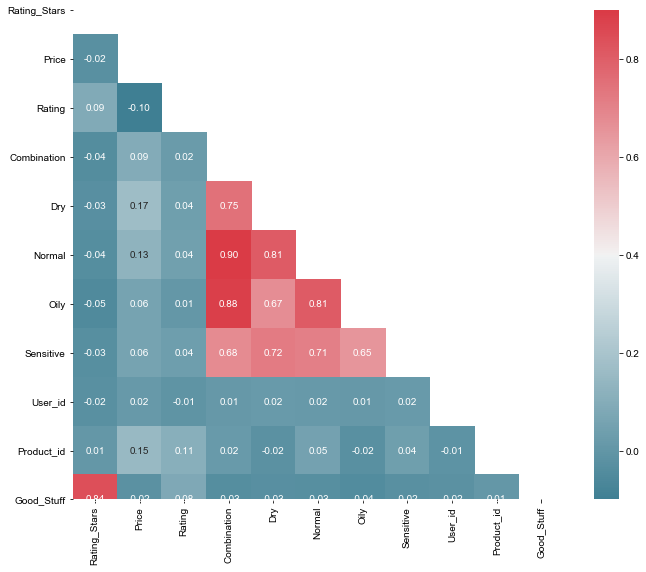

In [18]:
corr_matrix=df.corr()

plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

**Inferences:**
1. Good_Stuff is highly positively correlated with Rating_Stars
    
2. Dry and Sensitive are moderately correlated while Normal and Oily are highly correlated with Combination.
    
3. Oily and Sensitive are moderately correlated while Normal is highly correlated with Dry.

4. Sensitive is moderately correlated while Oily is highly correlated with Normal.

5.  Sensitive is moderately correlated with Oily.

## 4.2.3 Insights from the data <a id = 'insights'></a>

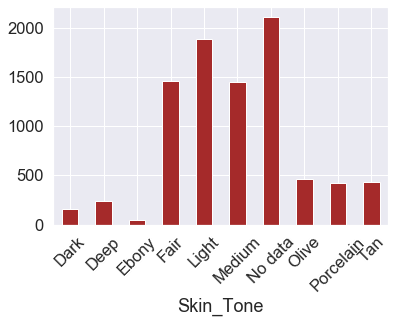

In [19]:
skintone_stats = df.groupby('Skin_Tone')['Username'].count()
skintone_stats.plot.bar(color = 'brown', rot=45)

**Most consumers who visit the site have skin shades between fair, light and medium. However, a lot of the consumers do not enter their skin color.**

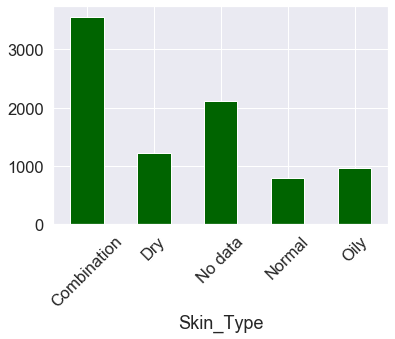

In [20]:
skintype_stats = df.groupby('Skin_Type')['Username'].count()
skintype_stats.plot.bar(color = 'darkgreen', rot=45)

**The majority of the consumer base has combination type of skin.**

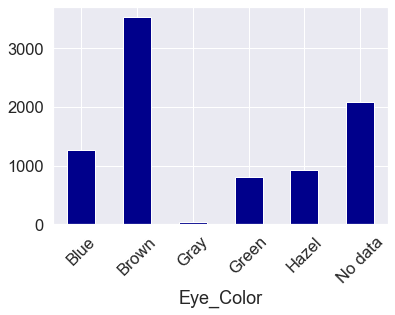

In [21]:
eyecolor_stats = df.groupby('Eye_Color')['Username'].count()
eyecolor_stats.plot.bar(color = 'darkblue', rot=45)

**Majority of the consumers visiting the site have brown eyes.**

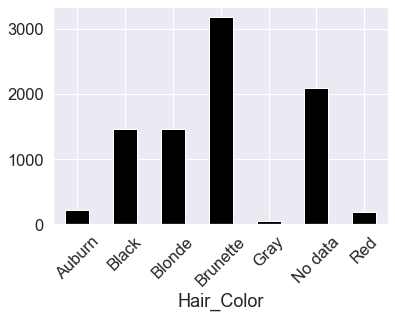

In [22]:
haircolor_stats = df.groupby('Hair_Color')['Username'].count()
haircolor_stats.plot.bar(color = 'black', rot=45)

**Majority of the consumers visiting the site have brown hair.**

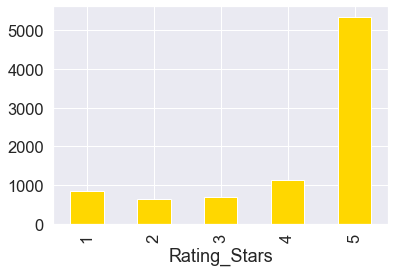

In [23]:
rating_stats = df.groupby('Rating_Stars')['Username'].count()
rating_stats.plot.bar(color = 'gold')

**Majority of the consumers visiting the site have rated the products a full 5 stars.**

### 4.2.4 Creating a separate dataset for building recommendation system <a id = 'rec'></a>

In [24]:
product_rating = df1[['User_id','Product_id','Rating_Stars','Product']]

In [25]:
product_rating.isna().sum()

User_id         0
Product_id      0
Rating_Stars    0
Product         0
dtype: int64

In [26]:
product_rating.head()

User_id  Product_id  Rating_Stars                         Product
0     3420         157             5  Superfood Antioxidant Cleanser
1     2483         157             1  Superfood Antioxidant Cleanser
2     2715         157             5  Superfood Antioxidant Cleanser
3     4497         157             5  Superfood Antioxidant Cleanser
4     5017         157             5  Superfood Antioxidant Cleanser

In [27]:
product_rating = product_rating.drop_duplicates(['User_id','Product'])

In [28]:
product_rating.shape

(7497, 4)

# 5. Data Preprocessing <a id= 'preprocessing'></a>

## 5.1 Feature Scaling <a id = 'feat_scaling'></a>

In [29]:
df1.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
1      PatTea    Medium  Combination     Brown        Red             1   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
1  Unfortunately this doesn’t work for everyone. ...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   

                          Product                Brand  Price   Rating  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   

                                         Ingredients  Combination  Dry  \
0  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
1  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
2  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
3  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
4  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   

   Normal  Oily  Sensitive  Category  User_id  Product_id  
0       0     0          0  Cleanser     3420         157  
1       0     0          0  Cleanser     2483         157  
2       0     0          0  Cleanser     2715         157  
3       0     0          0  Cleanser     4497         157  
4       0     0          0  Cleanser     5017         157

#### Preparing data for clustering

In [30]:
df_num = df1[['Product','Rating','Price']]

In [31]:
df_num.duplicated(subset = ['Product']).sum()

8334

In [32]:
df_num.drop_duplicates(subset = ['Product'],inplace=True)

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_num1 = df_num.drop('Product',axis=1)
dfcs = ss.fit_transform(df_num1)
X = pd.DataFrame(dfcs, columns=['avg_rating','Price'])


In [34]:
X.head()

avg_rating     Price
0    0.243769 -0.353183
1    0.470950 -1.125771
2    0.470950 -0.672874
3   -0.437774 -0.406465
4    0.243769  0.419405

# 6. Kmeans <a id= 'kmeans'></a>

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [36]:
ssd = []
sscore = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=4)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
    ss = silhouette_score(X, kmeans.labels_)
    sscore.append(ss)

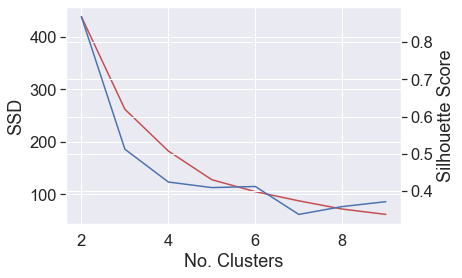

In [37]:
fig, ax = plt.subplots()
ax.plot(range(2,10), ssd, 'r')
ax.set_xlabel('No. Clusters')
ax.set_ylabel('SSD')
ax1 = ax.twinx()
ax1.plot(range(2,10), sscore)
ax1.set_ylabel('Silhouette Score')
plt.show()

In [38]:
from kneed import KneeLocator
kl = KneeLocator(range(2,10), ssd, curve="convex", direction="decreasing")
kl.elbow

5

From the graph, we see that the ideal number of clusters is 5, as verified by the KneeLocator.

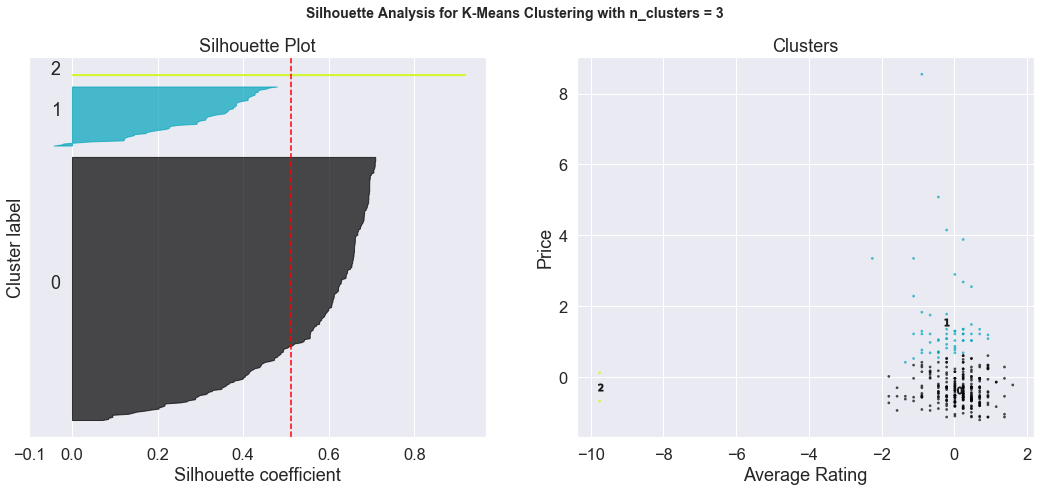

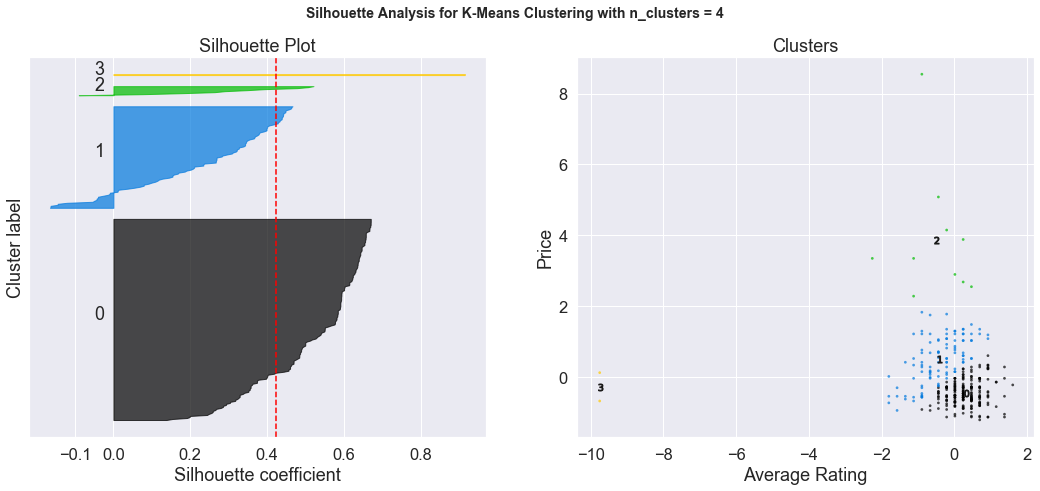

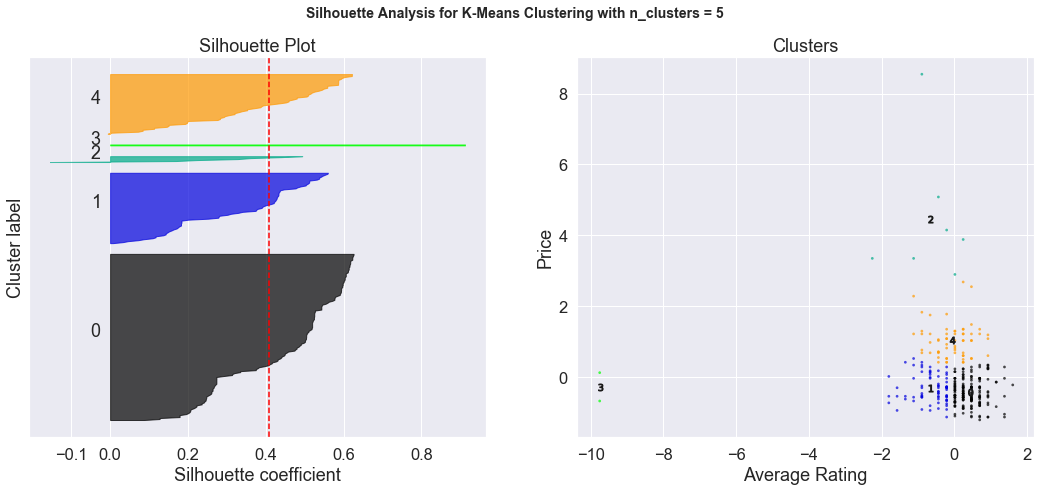

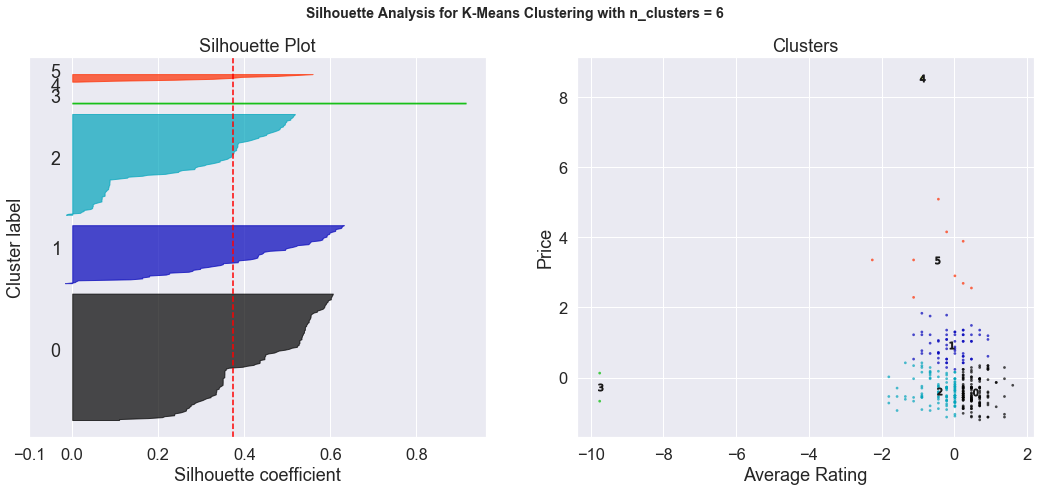

In [39]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm

# consider the number of clusters
n_clusters = [ 3, 4, 5, 6]

# consider an array of the data
X = np.array(X)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    ax2.set_xlabel("Average Rating")
    ax2.set_ylabel("Price")
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

In [40]:
new_clusters = KMeans(n_clusters = 5, random_state = 10)
new_clusters.fit(X)
df_cluster=df_num.copy()
df_cluster['Cluster'] = new_clusters.labels_

In [41]:
df_cluster.head()

Product   Rating  Price  Cluster
0           Superfood Antioxidant Cleanser 4.400000     36        0
48           Cleansing & Exfoliating Wipes 4.500000      7        0
96             Purity Made Simple Cleanser 4.500000     24        0
144            Beste™ No. 9 Jelly Cleanser 4.100000     34        1
192  The Rice Polish Foaming Enzyme Powder 4.400000     65        4

0    171
1     73
4     62
2      7
3      2
Name: Cluster, dtype: int64


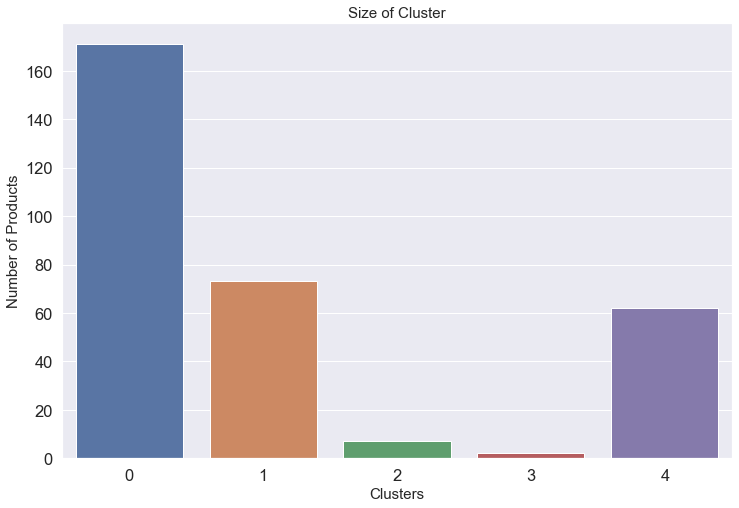

In [42]:
# use 'seaborn' library to plot a barplot for cluster size
print(df_cluster['Cluster'].value_counts())
plt.figure(figsize=(12,8))
sns.countplot(data= df_cluster, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Products', fontsize = 15)
plt.show()

The size of Cluster 0 is the greatest, followed by Cluster 1, Cluster 4, Cluster 2 and Cluster 3.

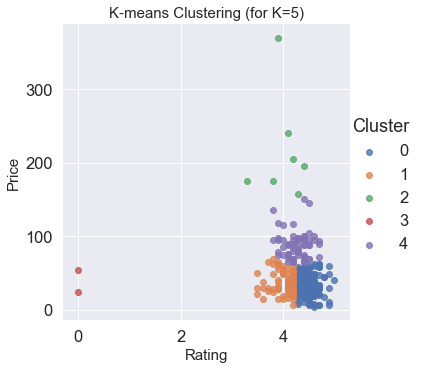

In [43]:
# plot the lmplot to visualize the clusters
# pass the different markers to display the points in each cluster with different shapes
# the 'hue' parameter returns colors for each cluster
sns.lmplot(x = 'Rating', y = 'Price', data = df_cluster, hue = 'Cluster', fit_reg = False, size = 5)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-means Clustering (for K=5)', fontsize = 15)
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Price', fontsize = 15)

# display the plot
plt.show()


From the plot, we can see that the clusters are clearly formed. The largest cluster(cluster-0) contains products that are lower in price and also have a higher average rating.

# 7. Memory Based Recommender <a id= 'memory'></a>


In [44]:
product_rating_pivot = product_rating.pivot(index ='Product',columns = 'User_id',values = "Rating_Stars" )
product_rating_pivot = product_rating_pivot.fillna(0)
product_rating_pivot.head()

User_id                              0        1        2        3        4     \
Product                                                                         
+Retinol Vita C Power Serum      0.000000 0.000000 0.000000 0.000000 0.000000   
100 percent Pure Argan Oil       0.000000 0.000000 0.000000 0.000000 0.000000   
100 percent Pure Argan Oil Light 0.000000 0.000000 0.000000 0.000000 0.000000   
3 Muslin Cloths                  0.000000 0.000000 0.000000 0.000000 0.000000   
3% Glycolic Solutions Cleanser   0.000000 0.000000 0.000000 0.000000 0.000000   

User_id                              5        6        7        8        9     \
Product                                                                         
+Retinol Vita C Power Serum      0.000000 0.000000 0.000000 0.000000 0.000000   
100 percent Pure Argan Oil       0.000000 0.000000 0.000000 0.000000 0.000000   
100 percent Pure Argan Oil Light 0.000000 0.000000 0.000000 0.000000 0.000000   
3 Muslin Cloths                  0.000000 0.000000 0.000000 0.000000 0.000000   
3% Glycolic Solutions Cleanser   0.000000 0.000000 0.000000 0.000000 0.000000   

User_id                              10       11       12       13       14    \
Product                                                                         
+Retinol Vita C Power Serum      0.000000 0.000000 0.000000 0.000000 0.000000   
100 percent Pure Argan Oil       0.000000 0.000000 0.000000 0.000000 0.000000   
100 percent Pure Argan Oil Light 0.000000 0.000000 0.000000 0.000000 0.000000   
3 Muslin Cloths                  0.000000 0.000000 0.000000 0.000000 0.000000   
3% Glycolic Solutions Cleanser   0.000000 0.000000 0.000000 0.000000 0.000000   

User_id                              15       16       17       18       19    \
Product                                                                         
+Retinol Vita C Power Serum      0.000000 0.000000 0.000000 0.000000 0.000000   
100 percent Pure Argan Oil       0.000000 0.000000 0.000000 0.000000 0.000000   
100 percent Pure Argan Oil Light 0.000000 0.000000 0.000000 0.000000 0.000000   
3 Muslin Cloths                  0.000000 0.000000 0.000000 0.000000 0.000000   
3% Glycolic Solutions Cleanser   0.000000 0.000000 0.000000 0.000000 0.000000   

User_id                              20       21       22       23       24    \
Product                                                                         
+Retinol Vita C Power Serum      0.000000 0.000000 0.000000 0.000000 0.000000   
100 percent Pure Argan Oil       0.000000 0.000000 0.000000 0.000000 0.000000   
100 percent Pure Argan Oil Light 0.000000 0.000000 0.000000 0.000000 0.000000   
3 Muslin Cloths                  0.000000 0.000000 0.000000 0.000000 0.000000   
3% Glycolic Solutions Cleanser   0.000000 0.000000 0.000000 0.000000 0.000000   

User_id                              25       26       27       28       29    \
Product                                                                         
+Retinol Vita C Power Serum      0.000000 0.000000 0.000000 0.000000 0.000000   
100 percent Pure Argan Oil       0.000000 0.000000 0.000000 0.000000 0.000000   
100 percent Pure Argan Oil Light 0.000000 0.000000 0.000000 0.000000 0.000000   
3 Muslin Cloths                  0.000000 0.000000 0.000000 0.000000 0.000000   
3% Glycolic Solutions Cleanser   0.000000 0.000000 0.000000 0.000000 0.000000   

User_id                              30       31       32       33       34    \
Product                                                                         
+Retinol Vita C Power Serum      0.000000 0.000000 0.000000 0.000000 0.000000   
100 percent Pure Argan Oil       0.000000 0.000000 0.000000 0.000000 0.000000   
100 percent Pure Argan Oil Light 0.000000 0.000000 0.000000 0.000000 0.000000   
3 Muslin Cloths                  0.000000 0.000000 0.000000 0.000000 0.000000   
3% Glycolic Solutions Cleanser   0.000000 0.000000 0.000000 0.000000 0.000000   

User_id                 

## 7.1 Using Knn <a id= 'use_knn'></a>

In [45]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine')
model_knn.fit(product_rating_pivot)

NearestNeighbors(metric='cosine')

In [46]:
distances, indices = model_knn.kneighbors(product_rating_pivot,n_neighbors = 6)

In [47]:
rec = pd.DataFrame(indices,columns=['product0','product1','product2','product3','product4','product5'])
rec.head()

product0  product1  product2  product3  product4  product5
0         0       255       191        96       212       211
1         1       226       227       297       176       270
2         2       297       176       133       241       119
3         3       130       183        17       226       199
4         4         7       199       212       210       208

In [48]:
product_rating_pivot.index

Index(['+Retinol Vita C Power Serum', '100 percent Pure Argan Oil',
       '100 percent Pure Argan Oil Light', '3 Muslin Cloths',
       '3% Glycolic Solutions Cleanser', '5 in 1 Face Cream SPF 30',
       '7 Day Scrub Cream Rinse-Off Formula', '8% Glycolic Solutions Toner',
       'A Perfect World™ Age-Defense Treatment Lotion with White Tea',
       'AHA/BHA Acne Clearing Gel',
       ...
       'Vitamin Nectar Antioxidant Face Mist', 'Water Bank Moisture Cream',
       'Water Drench Hyaluronic Cloud Cream',
       'Water Drench Hyaluronic Cloud Serum', 'Waterfall Glacier Water Cream',
       'Waterproof Eye Makeup Remover',
       'White Lucent Brightening Cleansing Foam',
       'Witch Hazel Herbal Extract Toner',
       'Wrinkle Warrior™ 2-in-1 Plumping Moisturizer + Serum',
       'Zero Oil™ Pore Purifying Toner'],
      dtype='object', name='Product', length=315)

In [49]:
rec2 = rec.copy()
for i in range(0,6):
    products = pd.DataFrame(product_rating_pivot.index).reset_index()

In [50]:
products

index                                            Product
0        0                        +Retinol Vita C Power Serum
1        1                         100 percent Pure Argan Oil
2        2                   100 percent Pure Argan Oil Light
3        3                                    3 Muslin Cloths
4        4                     3% Glycolic Solutions Cleanser
5        5                           5 in 1 Face Cream SPF 30
6        6                7 Day Scrub Cream Rinse-Off Formula
7        7                        8% Glycolic Solutions Toner
8        8  A Perfect World™ Age-Defense Treatment Lotion ...
9        9                          AHA/BHA Acne Clearing Gel
10      10                       AHA/BHA Exfoliating Cleanser
11      11                                     Acne Body Wash
12      12                                 Acne Clearing Wash
13      13                                  Acne Healing Dots
14      14                   Acne Solutions Clarifying Lotion
15      15                      Acne Solutions Cleansing Foam
16      16                    Advanced Acne & Wrinkle Reducer
17      17                    Advanced Active Radiance® Serum
18      18          Advanced Génifique Youth Activating Serum
19      19  Advanced Night Repair Synchronized Recovery Co...
20      20              Alpha Beta® Extra Strength Daily Peel
21      21                   Alpha Beta® Universal Daily Peel
22      22  Amazonian Clay BB Tinted Moisturizer Broad Spe...
23      23                           Anti Bac Clearing Lotion
24      24                           Anti-Aging Cleansing Gel
25      25                            Aqua Bomb Sleeping Mask
26      26                                Argan Cleansing Oil
27      27                 B-Hydra™ Intensive Hydration Serum
28      28  BB Tinted Treatment 12-Hour Primer Broad Spect...
29      29              Baby Pekee Bar™ + Juju Bar Travel Duo
30      30               Backlight Priming Filter Face Primer
31      31                 Balancing Force™ Oil Control Toner
32      32               Bamboo Charcoal Detoxifying Soap Bar
33      33                                      Beauty Elixir
34      34                Benefiance NutriPerfect Night Cream
35      35  Benefiance WrinkleResist24 Balancing Softener ...
36      36                        Beste™ No. 9 Jelly Cleanser
37      37          Bi-Facil Double-Action Eye Makeup Remover
38      38          Bio Retinoid Anti-Wrinkle Concentrate Oil
39      39                     Black Charcoal Blotting Linens
40      40                          Black Tea Age-Delay Cream
41      41                  Black Tea Age-Delay Firming Serum
42      42         Black Tea Corset Cream Firming Moisturizer
43      43  Blackhead Solutions 7 Day Deep Pore Cleanse & ...
44      44  Blackhead Solutions Self-heating Blackhead Ext...
45      45                                    Blotting Papers
46      46                Blue Herbal Acne Cleanser Treatment
47      47                   Blueberry Bounce Gentle Cleanser
48      48                                  Breakout Fighters
49      49                               Brightening Cleanser
50      50          Bye Bye Breakout™ Full-Coverage Concealer
51      51        C+ Collagen Brighten & Firm Vitamin C Serum
52      52  COMPLEXION RESCUE™ Tinted Moisturizer Broad Sp...
53      53             Calendula Deep Clean Foaming Face Wash
54      54        Calendula Herbal Extract Alcohol Free Toner
55      55                              Caviar Lime Acid Peel
56      56                              Ceramic Slip Cleanser
57      57                                   Ceramidin™ Cream
58      58                       Charlotte's Magic Cream Mini
59      59              Checks and Balances™ Frothy Face Wash
60      60                                Clarifying Cleanser
61      61                                Clarifying Lotion 1
62      62                                Clarifying Lotion 2
63      63                           

In [51]:
rec2 = rec.copy()
for i in range(0,6):
    products = pd.DataFrame(product_rating_pivot.index).reset_index()
    products = products.rename(columns={'index':f'product{i}'})

In [52]:
products

product5                                            Product
0           0                        +Retinol Vita C Power Serum
1           1                         100 percent Pure Argan Oil
2           2                   100 percent Pure Argan Oil Light
3           3                                    3 Muslin Cloths
4           4                     3% Glycolic Solutions Cleanser
5           5                           5 in 1 Face Cream SPF 30
6           6                7 Day Scrub Cream Rinse-Off Formula
7           7                        8% Glycolic Solutions Toner
8           8  A Perfect World™ Age-Defense Treatment Lotion ...
9           9                          AHA/BHA Acne Clearing Gel
10         10                       AHA/BHA Exfoliating Cleanser
11         11                                     Acne Body Wash
12         12                                 Acne Clearing Wash
13         13                                  Acne Healing Dots
14         14                   Acne Solutions Clarifying Lotion
15         15                      Acne Solutions Cleansing Foam
16         16                    Advanced Acne & Wrinkle Reducer
17         17                    Advanced Active Radiance® Serum
18         18          Advanced Génifique Youth Activating Serum
19         19  Advanced Night Repair Synchronized Recovery Co...
20         20              Alpha Beta® Extra Strength Daily Peel
21         21                   Alpha Beta® Universal Daily Peel
22         22  Amazonian Clay BB Tinted Moisturizer Broad Spe...
23         23                           Anti Bac Clearing Lotion
24         24                           Anti-Aging Cleansing Gel
25         25                            Aqua Bomb Sleeping Mask
26         26                                Argan Cleansing Oil
27         27                 B-Hydra™ Intensive Hydration Serum
28         28  BB Tinted Treatment 12-Hour Primer Broad Spect...
29         29              Baby Pekee Bar™ + Juju Bar Travel Duo
30         30               Backlight Priming Filter Face Primer
31         31                 Balancing Force™ Oil Control Toner
32         32               Bamboo Charcoal Detoxifying Soap Bar
33         33                                      Beauty Elixir
34         34                Benefiance NutriPerfect Night Cream
35         35  Benefiance WrinkleResist24 Balancing Softener ...
36         36                        Beste™ No. 9 Jelly Cleanser
37         37          Bi-Facil Double-Action Eye Makeup Remover
38         38          Bio Retinoid Anti-Wrinkle Concentrate Oil
39         39                     Black Charcoal Blotting Linens
40         40                          Black Tea Age-Delay Cream
41         41                  Black Tea Age-Delay Firming Serum
42         42         Black Tea Corset Cream Firming Moisturizer
43         43  Blackhead Solutions 7 Day Deep Pore Cleanse & ...
44         44  Blackhead Solutions Self-heating Blackhead Ext...
45         45                                    Blotting Papers
46         46                Blue Herbal Acne Cleanser Treatment
47         47                   Blueberry Bounce Gentle Cleanser
48         48                                  Breakout Fighters
49         49                               Brightening Cleanser
50         50          Bye Bye Breakout™ Full-Coverage Concealer
51         51        C+ Collagen Brighten & Firm Vitamin C Serum
52         52  COMPLEXION RESCUE™ Tinted Moisturizer Broad Sp...
53         53             Calendula Deep Clean Foaming Face Wash
54         54        Calendula Herbal Extract Alcohol Free Toner
55         55                              Caviar Lime Acid Peel
56         56                              Ceramic Slip Cleanser
57         57                                   Ceramidin™ Cream
58         58                       Charlotte's Magic Cream Mini
59         59              Checks and Balances™ Frothy Face Wash
60         60                           

In [53]:
rec2 = rec.copy()
for i in range(0,6):
    products = pd.DataFrame(product_rating_pivot.index).reset_index()
    products = products.rename(columns={'index':f'product{i}'})
    rec2 = pd.merge(rec2,products,on=[f'product{i}'],how='left')

In [54]:
rec

product0  product1  product2  product3  product4  product5
0           0       255       191        96       212       211
1           1       226       227       297       176       270
2           2       297       176       133       241       119
3           3       130       183        17       226       199
4           4         7       199       212       210       208
5           5       130       183        17       226       199
6           6       221       210       129       170       158
7           7       308       121         4       212       210
8           8       228        29       189       184       211
9           9       241       212       210       211       208
10         10       222        16       271       147       210
11         11       236        39       164       214       212
12         12       211       212       210       208       213
13         13       149       212       210       208       211
14         14        15       111        47        94        44
15         15        14       111        94        44        64
16         16        10        88       237       281       238
17         17       130       183       226       199       194
18         18        37        58       267        82       171
19         19       261       155        66       154       118
20         20       243       124       252       261       211
21         21       263       146       305       213       211
22         22       213       238       215       245       200
23         23       241       180        99       211       213
24         24       116       213       211       212       209
25         25       157       248       229       164       210
26         26        22       147       211       212       213
27         27        84       250        72       225       270
28         28       130       183        17       226       199
29         29       228         8        28        42        27
30         30       298       304       204        54        59
31         31        47       137        48       197       269
32         32       156       274       151       265       174
33         33       161       252        37       296       274
34         34       144       182       118       210       209
35         35       134       103       234       211       212
36         36        57       212       214       211       209
37         37       171       269        18        58       267
38         38        86       296       131       211       210
39         39        11       210       211       213       212
40         40        71        42        41       212       210
41         41        40       210       212       209       207
42         42        71        40       173       217        29
43         43        50       255        61        63        44
44         44       111        89        15       118        32
45         45        37        67       278       147       113
46         46       289       212       211       209       213
47         47       309       292       244        31        14
48         48        31       210       212       208       211
49         49       193        18       251       313       249
50         50       287        43       255        61        83
51         51       126       123       209       210       208
52         52       213        22       238       215       211
53         53       112       150        81        54        55
54         54       164       109        53       214       260
55         55        18        81        53        68       216
56         56        59       212       214       211       209
57         57       119       111       309       249        59
58         58       267       159        18        82       171
59         59       295       231        47       222       229
60         60       241       213       252       247        74
61         61       151        50    

In [55]:
rec2

product0  product1  product2  product3  product4  product5  \
0           0       255       191        96       212       211   
1           1       226       227       297       176       270   
2           2       297       176       133       241       119   
3           3       130       183        17       226       199   
4           4         7       199       212       210       208   
5           5       130       183        17       226       199   
6           6       221       210       129       170       158   
7           7       308       121         4       212       210   
8           8       228        29       189       184       211   
9           9       241       212       210       211       208   
10         10       222        16       271       147       210   
11         11       236        39       164       214       212   
12         12       211       212       210       208       213   
13         13       149       212       210       208       211   
14         14        15       111        47        94        44   
15         15        14       111        94        44        64   
16         16        10        88       237       281       238   
17         17       130       183       226       199       194   
18         18        37        58       267        82       171   
19         19       261       155        66       154       118   
20         20       243       124       252       261       211   
21         21       263       146       305       213       211   
22         22       213       238       215       245       200   
23         23       241       180        99       211       213   
24         24       116       213       211       212       209   
25         25       157       248       229       164       210   
26         26        22       147       211       212       213   
27         27        84       250        72       225       270   
28         28       130       183        17       226       199   
29         29       228         8        28        42        27   
30         30       298       304       204        54        59   
31         31        47       137        48       197       269   
32         32       156       274       151       265       174   
33         33       161       252        37       296       274   
34         34       144       182       118       210       209   
35         35       134       103       234       211       212   
36         36        57       212       214       211       209   
37         37       171       269        18        58       267   
38         38        86       296       131       211       210   
39         39        11       210       211       213       212   
40         40        71        42        41       212       210   
41         41        40       210       212       209       207   
42         42        71        40       173       217        29   
43         43        50       255        61        63        44   
44         44       111        89        15       118        32   
45         45        37        67       278       147       113   
46         46       289       212       211       209       213   
47         47       309       292       244        31        14   
48         48        31       210       212       208       211   
49         49       193        18       251       313       249   
50         50       287        43       255        61        83   
51         51       126       123       209       210       208   
52         52       213        22       238       215       211   
53         53       112       150        81        54        55   
54         54       164       109        53       214       260   
55         55        18        81        53        68       216   
56         56        59       212       214       211       209   
57         57       119       111       309       249        59   
58         58       267       159        18        8

In [56]:
rec2 = rec.copy()
for i in range(0,6):
    products = pd.DataFrame(product_rating_pivot.index).reset_index()
    products = products.rename(columns={'index':f'product{i}'})
    rec2 = pd.merge(rec2,products,on=[f'product{i}'],how='left')
    rec2 = rec2.drop(f'product{i}',axis=1)

In [57]:
rec2

Product_x  \
0                          +Retinol Vita C Power Serum   
1                           100 percent Pure Argan Oil   
2                     100 percent Pure Argan Oil Light   
3                                      3 Muslin Cloths   
4                       3% Glycolic Solutions Cleanser   
5                             5 in 1 Face Cream SPF 30   
6                  7 Day Scrub Cream Rinse-Off Formula   
7                          8% Glycolic Solutions Toner   
8    A Perfect World™ Age-Defense Treatment Lotion ...   
9                            AHA/BHA Acne Clearing Gel   
10                        AHA/BHA Exfoliating Cleanser   
11                                      Acne Body Wash   
12                                  Acne Clearing Wash   
13                                   Acne Healing Dots   
14                    Acne Solutions Clarifying Lotion   
15                       Acne Solutions Cleansing Foam   
16                     Advanced Acne & Wrinkle Reducer   
17                     Advanced Active Radiance® Serum   
18           Advanced Génifique Youth Activating Serum   
19   Advanced Night Repair Synchronized Recovery Co...   
20               Alpha Beta® Extra Strength Daily Peel   
21                    Alpha Beta® Universal Daily Peel   
22   Amazonian Clay BB Tinted Moisturizer Broad Spe...   
23                            Anti Bac Clearing Lotion   
24                            Anti-Aging Cleansing Gel   
25                             Aqua Bomb Sleeping Mask   
26                                 Argan Cleansing Oil   
27                  B-Hydra™ Intensive Hydration Serum   
28   BB Tinted Treatment 12-Hour Primer Broad Spect...   
29               Baby Pekee Bar™ + Juju Bar Travel Duo   
30                Backlight Priming Filter Face Primer   
31                  Balancing Force™ Oil Control Toner   
32                Bamboo Charcoal Detoxifying Soap Bar   
33                                       Beauty Elixir   
34                 Benefiance NutriPerfect Night Cream   
35   Benefiance WrinkleResist24 Balancing Softener ...   
36                         Beste™ No. 9 Jelly Cleanser   
37           Bi-Facil Double-Action Eye Makeup Remover   
38           Bio Retinoid Anti-Wrinkle Concentrate Oil   
39                      Black Charcoal Blotting Linens   
40                           Black Tea Age-Delay Cream   
41                   Black Tea Age-Delay Firming Serum   
42          Black Tea Corset Cream Firming Moisturizer   
43   Blackhead Solutions 7 Day Deep Pore Cleanse & ...   
44   Blackhead Solutions Self-heating Blackhead Ext...   
45                                     Blotting Papers   
46                 Blue Herbal Acne Cleanser Treatment   
47                    Blueberry Bounce Gentle Cleanser   
48                                   Breakout Fighters   
49                                Brightening Cleanser   
50           Bye Bye Breakout™ Full-Coverage Concealer   
51         C+ Collagen Brighten & Firm Vitamin C Serum   
52   COMPLEXION RESCUE™ Tinted Moisturizer Broad Sp...   
53              Calendula Deep Clean Foaming Face Wash   
54         Calendula Herbal Extract Alcohol Free Toner   
55                               Caviar Lime Acid Peel   
56                               Ceramic Slip Cleanser   
57                                    Ceramidin™ Cream   
58                        Charlotte's Magic Cream Mini   
59               Checks and Balances™ Frothy Face Wash   
60                                 Clarifying Cleanser   
61                                 Clarifying Lotion 1   
62                                 Clarifying Lotion 2   
63                                 Clarifying Lotion 3   
64                                    Clarifying Toner   
65              Clean Bee Ultra Gentle Facial Cleanser   
66                                            Cleanser   
67                       Cleansing & Exfoliating Wipes   
68                          Cleansing Spa W

In [58]:
rec2 = rec.copy()
for i in range(0,6):
    products = pd.DataFrame(product_rating_pivot.index).reset_index()
    products = products.rename(columns={'index':f'product{i}'})
    rec2 = pd.merge(rec2,products,on=[f'product{i}'],how='left')
    rec2 = rec2.drop(f'product{i}',axis=1)
    rec2 = rec2.rename(columns={'Product':f'product{i}'})


In [59]:
rec2.head(10)

product0  \
0                        +Retinol Vita C Power Serum   
1                         100 percent Pure Argan Oil   
2                   100 percent Pure Argan Oil Light   
3                                    3 Muslin Cloths   
4                     3% Glycolic Solutions Cleanser   
5                           5 in 1 Face Cream SPF 30   
6                7 Day Scrub Cream Rinse-Off Formula   
7                        8% Glycolic Solutions Toner   
8  A Perfect World™ Age-Defense Treatment Lotion ...   
9                          AHA/BHA Acne Clearing Gel   

                                            product1  \
0  Take The Day Off Micellar Cleansing Towelettes...   
1                    Rose Deep Hydration Moisturizer   
2  Vinopure Natural Salicylic Acid Pore Minimizin...   
3                             GENIUS Liquid Collagen   
4                        8% Glycolic Solutions Toner   
5                             GENIUS Liquid Collagen   
6                         Rinse-Off Foaming Cleanser   
7                Water Drench Hyaluronic Cloud Serum   
8     Rose Gold Elixir – 24k Gold Infused Beauty Oil   
9                          Snow Mushroom Water Serum   

                                            product2  \
0                            Photo Finish Primerizer   
1                                  Rose Floral Toner   
2  Moisture Surge 72-Hour Auto-Replenishing Hydrator   
3                 Outsmart Acne Clarifying Treatment   
4  Powerful-Strength Line-Reducing Concentrate 12...   
5                 Outsmart Acne Clarifying Treatment   
6              R.N.A. POWER Anti-Aging Essence Serum   
7                          Facial Treatment Cleanser   
8              Baby Pekee Bar™ + Juju Bar Travel Duo   
9                            Rapid Collagen Infusion   

                                            product3  \
0        Epidermal Re-Texturizing Micro-Dermabrasion   
1  Vinopure Natural Salicylic Acid Pore Minimizin...   
2         GLOWSTARTER™ Mega Illuminating Moisturizer   
3                    Advanced Active Radiance® Serum   
4                            Rapid Collagen Infusion   
5                    Advanced Active Radiance® Serum   
6  Fresh Pressed Renewing Powder Cleanser with Pu...   
7                     3% Glycolic Solutions Cleanser   
8   Perfectionist CP+R Wrinkle Lifting/Firming Serum   
9              R.N.A. POWER Anti-Aging Essence Serum   

                                            product4  \
0                            Rapid Collagen Infusion   
1  Moisture Surge 72-Hour Auto-Replenishing Hydrator   
2                          Snow Mushroom Water Serum   
3                    Rose Deep Hydration Moisturizer   
4              R.N.A. POWER Anti-Aging Essence Serum   
5                    Rose Deep Hydration Moisturizer   
6        Mega-Mushroom Skin Relief Micellar Cleanser   
7                            Rapid Collagen Infusion   
8      POWER Advanced Wrinkle Fighter 360° Eye Serum   
9        Rapid Age Spot and Pigment Lightening Serum   

                                            product5  
0        Rapid Age Spot and Pigment Lightening Serum  
1                           The True Cream Aqua Bomb  
2                               Facial Radiance Pads  
3  Powerful-Strength Line-Reducing Concentrate 12...  
4                        Purity Made Simple Cleanser  
5  Powerful-Strength Line-Reducing Concentrate 12...  
6                                 Liquid Facial Soap  
7              R.N.A. POWER Anti-Aging Essence Serum  
8        Rapid Age Spot and Pigment Lightening Serum  
9                        Purity Made Simple Cleanser

 Above table shows the ten best recommendations for the product

## 7.2 Using SVD <a id= ' use_svd'></a>

In [60]:
product_rating_pivot.shape

(315, 6851)

In [61]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(random_state=4,n_components=500)
svd.fit(product_rating_pivot)

TruncatedSVD(n_components=500, random_state=4)

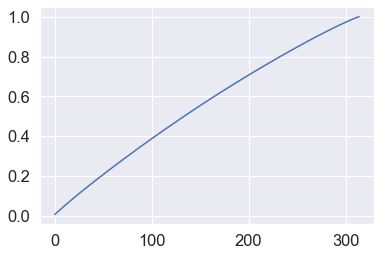

In [62]:
plt.plot(np.cumsum(svd.explained_variance_ratio_))

As the above plot suggests that almost the variance is covered at 300 components only

In [63]:
np.cumsum(svd.explained_variance_ratio_)

array([0.0061129 , 0.01076819, 0.01456732, 0.01890404, 0.02331443,
       0.02767451, 0.03206817, 0.03632746, 0.04056874, 0.04479999,
       0.04906804, 0.05330071, 0.05752256, 0.06171423, 0.06586191,
       0.07000584, 0.07416105, 0.07829369, 0.08240235, 0.08650415,
       0.09059035, 0.094633  , 0.098645  , 0.10266541, 0.10668104,
       0.11069195, 0.1146626 , 0.11862882, 0.12254803, 0.1265151 ,
       0.13047215, 0.13441705, 0.13834711, 0.14223082, 0.14612821,
       0.15001528, 0.1538879 , 0.15775511, 0.16160729, 0.16545653,
       0.16928553, 0.17310115, 0.17692189, 0.18073243, 0.18452435,
       0.18830639, 0.19207718, 0.19576648, 0.19950982, 0.20326551,
       0.20702035, 0.21077352, 0.21452319, 0.21824015, 0.22196175,
       0.22568322, 0.22939225, 0.23308666, 0.23678044, 0.24047882,
       0.24417483, 0.24785125, 0.25152524, 0.2552029 , 0.2588397 ,
       0.26248158, 0.26612669, 0.26977446, 0.27339784, 0.27703803,
       0.28067469, 0.28429538, 0.28791745, 0.29152614, 0.29513

In [64]:
svd = TruncatedSVD(random_state=4,n_components=300)
svd.fit(product_rating_pivot)

TruncatedSVD(n_components=300, random_state=4)

In [65]:
product_rating_svd = svd.fit_transform(product_rating_pivot)

In [66]:
product_rating_svd.shape

(315, 300)

In [67]:
corr = np.corrcoef(product_rating_svd)
corr.shape

(315, 315)

In [68]:
corr

array([[ 1.00000000e+00, -7.47558566e-03, -2.64165115e-03, ...,
        -8.06643272e-04,  1.25260206e-02, -6.63703213e-03],
       [-7.47558566e-03,  1.00000000e+00, -1.52755499e-02, ...,
        -6.97888684e-03,  8.88023109e-02, -3.15452701e-02],
       [-2.64165115e-03, -1.52755499e-02,  1.00000000e+00, ...,
        -3.02281515e-03,  1.16426258e-02, -7.49130486e-03],
       ...,
       [-8.06643272e-04, -6.97888684e-03, -3.02281515e-03, ...,
         1.00000000e+00, -5.78742630e-03, -6.55045879e-03],
       [ 1.25260206e-02,  8.88023109e-02,  1.16426258e-02, ...,
        -5.78742630e-03,  1.00000000e+00, -2.21361434e-02],
       [-6.63703213e-03, -3.15452701e-02, -7.49130486e-03, ...,
        -6.55045879e-03, -2.21361434e-02,  1.00000000e+00]])

In [69]:
product_name = product_rating_pivot.index
product_list = list(product_name)



product_Rapid_Collagen_Infusion = product_list.index('Rapid Collagen Infusion')
product_Rapid_Collagen_Infusion

212

In [70]:
corr_Rapid_Collagen_Infusion= corr[product_Rapid_Collagen_Infusion]

In [71]:
product_name[(corr_Rapid_Collagen_Infusion)>0.05]

Index(['Advanced Active Radiance® Serum', 'Rapid Collagen Infusion',
       'Skintune Blur Perfecting Primer Serum'],
      dtype='object', name='Product')

Above output products are the similar products for the  Rapid_Collagen_Infusion

# 8. Model Based Collaborative Filtering <a id= 'model_cf'></a>

In [72]:
from surprise import SVD
from surprise import Dataset,Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

In [73]:
product_rating.head()

User_id  Product_id  Rating_Stars                         Product
0     3420         157             5  Superfood Antioxidant Cleanser
1     2483         157             1  Superfood Antioxidant Cleanser
2     2715         157             5  Superfood Antioxidant Cleanser
3     4497         157             5  Superfood Antioxidant Cleanser
4     5017         157             5  Superfood Antioxidant Cleanser

In [75]:
data = product_rating[['User_id', 'Product', 'Rating_Stars']]
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(data, reader=reader)

In [76]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD()
model.fit(trainset)

predictions = model.test(testset)
accuracy.rmse(predictions)


RMSE: 1.3023


1.3023329114852762

In [77]:
pred = pd.DataFrame(predictions)
pred.head(10)

uid                                        iid     r_ui      est  \
0  6794     Calendula Deep Clean Foaming Face Wash 5.000000 4.399016   
1  6485  Exfoliating Wipes - Pineapple - Smoothing 5.000000 4.542603   
2  2918             Rose Deep Hydration Face Serum 5.000000 3.895034   
3  1925                      Pore Treatment Strips 5.000000 4.302440   
4  3572             Max Complexion Correction Pads 5.000000 4.310754   
5  1834                 Face Buff Energizing Scrub 5.000000 4.646904   
6  1815             Zero Oil™ Pore Purifying Toner 5.000000 3.689563   
7    54                  Snow Mushroom Water Serum 5.000000 4.073066   
8  6646                  Clear Complexion Cleanser 5.000000 3.998749   
9  2296           Pore-Balance™ Facial Sauna Scrub 5.000000 4.433587   

                     details  
0  {'was_impossible': False}  
1  {'was_impossible': False}  
2  {'was_impossible': False}  
3  {'was_impossible': False}  
4  {'was_impossible': False}  
5  {'was_impossible': False}  
6  {'was_impossible': False}  
7  {'was_impossible': False}  
8  {'was_impossible': False}  
9  {'was_impossible': False}

In [78]:
items = df['Product'].unique()
test = [[2806, iid, 4] for iid in items]
predictions = model.test(test)
pred = pd.DataFrame(predictions)

In [79]:
pred.sort_values(by='est', ascending=False).head(10)

uid                                    iid  r_ui      est  \
132  2806  Cleansing Wipes - Rose - Moisturizing     4 4.927505   
183  2806              Mattifying Blotting Films     4 4.886112   
149  2806     Cleansing Spa Water Makeup Remover     4 4.864634   
103  2806      MakeUp-BreakUp Cool Cleansing Oil     4 4.849172   
4    2806  The Rice Polish Foaming Enzyme Powder     4 4.847582   
12   2806                          Facial Cotton     4 4.838684   
163  2806             Face Buff Energizing Scrub     4 4.837040   
214  2806                    Clarifying Lotion 1     4 4.758341   
99   2806    Benefiance NutriPerfect Night Cream     4 4.756029   
248  2806                   The Treatment Lotion     4 4.753037   

                       details  
132  {'was_impossible': False}  
183  {'was_impossible': False}  
149  {'was_impossible': False}  
103  {'was_impossible': False}  
4    {'was_impossible': False}  
12   {'was_impossible': False}  
163  {'was_impossible': False}  
214  {'was_impossible': False}  
99   {'was_impossible': False}  
248  {'was_impossible': False}

`est` in the table above is the predicted rating that user_id 2806 can give.

## 9. Content Based Recommendation System <a id= 'content'></a>

In [80]:
df1.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
1      PatTea    Medium  Combination     Brown        Red             1   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
1  Unfortunately this doesn’t work for everyone. ...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   

                          Product                Brand  Price   Rating  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   

                                         Ingredients  Combination  Dry  \
0  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
1  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
2  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
3  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
4  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   

   Normal  Oily  Sensitive  Category  User_id  Product_id  
0       0     0          0  Cleanser     3420         157  
1       0     0          0  Cleanser     2483         157  
2       0     0          0  Cleanser     2715         157  
3       0     0          0  Cleanser     4497         157  
4       0     0          0  Cleanser     5017         157

In [81]:
df1['content']=df1['Brand']+df1['Ingredients']+df1['Category']

In [82]:
df1.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
1      PatTea    Medium  Combination     Brown        Red             1   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
1  Unfortunately this doesn’t work for everyone. ...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   

                          Product                Brand  Price   Rating  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   

                                         Ingredients  Combination  Dry  \
0  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
1  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
2  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
3  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
4  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   

   Normal  Oily  Sensitive  Category  User_id  Product_id  \
0       0     0          0  Cleanser     3420         157   
1       0     0          0  Cleanser     2483         157   
2       0     0          0  Cleanser     2715         157   
3       0     0          0  Cleanser     4497         157   
4       0     0          0  Cleanser     5017         157   

                                             content  
0  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...  
1  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...  
2  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...  
3  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...  
4  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...

In [83]:
data=df1.copy()
data.drop_duplicates(subset=['Product','content'],inplace=True) 

In [84]:
data.reset_index(inplace=True,drop=True)

In [85]:
data.shape

(315, 21)

In [86]:
tf = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
tf_matrix = tf.fit_transform(data['content'])
tf_matrix.shape

(315, 11159)

In [87]:
simil = linear_kernel(tf_matrix, tf_matrix)
simil.shape

(315, 315)

In [88]:
simil

array([[1.        , 0.03464075, 0.01315967, ..., 0.0406002 , 0.00972513,
        0.05183464],
       [0.03464075, 1.        , 0.03150043, ..., 0.0380007 , 0.01524088,
        0.05084599],
       [0.01315967, 0.03150043, 1.        , ..., 0.01590835, 0.04189347,
        0.03209803],
       ...,
       [0.0406002 , 0.0380007 , 0.01590835, ..., 1.        , 0.02613741,
        0.0509585 ],
       [0.00972513, 0.01524088, 0.04189347, ..., 0.02613741, 1.        ,
        0.05505486],
       [0.05183464, 0.05084599, 0.03209803, ..., 0.0509585 , 0.05505486,
        1.        ]])

In [89]:
id=set(data['Product_id'].values)
simil = pd.DataFrame(simil, index=id, columns=id)
simil.columns = data['Product']
simil['Product'] = data['Product'].values

In [ ]:
id=set(data['Product_id'].values)
simil = pd.DataFrame(simil, index=id, columns=id)

In [91]:
simil.head()

0        1        2        3        4        5        6        7    \
0 1.000000 0.034641 0.013160 0.084188 0.049821 0.029989 0.000000 0.012085   
1 0.034641 1.000000 0.031500 0.098290 0.081254 0.043662 0.043992 0.026228   
2 0.013160 0.031500 1.000000 0.059308 0.014979 0.096928 0.028724 0.003735   
3 0.084188 0.098290 0.059308 1.000000 0.070404 0.033436 0.010202 0.039869   
4 0.049821 0.081254 0.014979 0.070404 1.000000 0.009627 0.004005 0.015881   

       8        9        10       11       12       13       14       15   \
0 0.079545 0.033959 0.000000 0.008482 0.000000 0.037546 0.033056 0.052510   
1 0.045465 0.028338 0.062848 0.019835 0.000000 0.061691 0.042229 0.002217   
2 0.053538 0.065955 0.000000 0.006825 0.000000 0.102318 0.120937 0.015642   
3 0.059354 0.022585 0.000000 0.055921 0.000000 0.040380 0.047120 0.017913   
4 0.027722 0.007731 0.000000 0.023752 0.000000 0.050530 0.012050 0.006031   

       16       17       18       19       20       21       22       23   \
0 0.136924 0.093262 0.064872 0.064927 0.012135 0.088992 0.061099 0.107244   
1 0.059966 0.101181 0.044614 0.046811 0.067626 0.036079 0.047813 0.025805   
2 0.137600 0.022152 0.028097 0.037557 0.081952 0.035494 0.041427 0.046347   
3 0.128829 0.104954 0.082952 0.038736 0.083506 0.039870 0.027546 0.042593   
4 0.033268 0.058270 0.055078 0.011550 0.012588 0.011891 0.019518 0.021078   

       24       25       26       27       28       29       30       31   \
0 0.028445 0.054028 0.057766 0.106375 0.023778 0.023264 0.051629 0.081625   
1 0.057389 0.100460 0.089802 0.012518 0.033297 0.035077 0.000000 0.036954   
2 0.013545 0.037410 0.020204 0.041446 0.078574 0.045899 0.000915 0.064246   
3 0.051099 0.062216 0.027709 0.035526 0.024338 0.024810 0.002952 0.046971   
4 0.025423 0.021188 0.027513 0.027778 0.010001 0.003670 0.000000 0.022796   

       32       33       34       35       36       37       38       39   \
0 0.017694 0.027291 0.032333 0.001250 0.000000 0.038078 0.035492 0.073779   
1 0.025526 0.092610 0.017589 0.001669 0.000000 0.055942 0.014564 0.018114   
2 0.071435 0.012213 0.188546 0.003924 0.000000 0.015788 0.002825 0.041525   
3 0.024970 0.028186 0.052711 0.001533 0.000000 0.049815 0.020390 0.030177   
4 0.007078 0.018701 0.003771 0.006026 0.000000 0.071166 0.235374 0.012028   

       40       41       42       43       44       45       46       47   \
0 0.086068 0.012932 0.011875 0.094838 0.000000 0.017577 0.080805 0.030629   
1 0.070171 0.000000 0.056256 0.052623 0.000000 0.022016 0.044492 0.026202   
2 0.067123 0.023054 0.050621 0.040325 0.000000 0.012971 0.047928 0.025619   
3 0.058759 0.003098 0.021549 0.037326 0.000000 0.003513 0.040989 0.026194   
4 0.026912 0.000000 0.010407 0.117158 0.000000 0.000000 0.023152 0.020258   

       48       49       50       51       52       53       54       55   \
0 0.084267 0.018638 0.057607 0.071514 0.049449 0.031407 0.174147 0.067757   
1 0.006773 0.049334 0.070151 0.063040 0.079460 0.068142 0.094873 0.053667   
2 0.103411 0.068642 0.056424 0.015719 0.023908 0.046897 0.071138 0.089024   
3 0.042644 0.037564 0.031511 0.046237 0.051515 0.044812 0.077514 0.072005   
4 0.000961 0.014522 0.055059 0.047183 0.013840 0.020738 0.068632 0.028388   

       56       57       58       59       60       61       62       63   \
0 0.000000 0.060698 0.036870 0.021494 0.020427 0.055739 0.028749 0.051927   
1 0.000000 0.047142 0.055038 0.033257 0.057692 0.051274 0.028469 0.051956   
2 0.000000 0.050284 0.011667 0.013060 0.016180 0.023414 0.022300 0.015000   
3 0.000000 0.053200 0.030675 0.041113 0.032646 0.030417 0.023514 0.060299   
4 0.000000 0.034735 0.012639 0.022698 0.072681 0.025077 0.019435 0.027451   

       64       65       66       67       68       69       70       71   \
0 0.057951 0.043740 0.022860 0.026157 0.034137 0.007188 0.009798 0.080979   
1 0.046741 0.068109 0.015575 0.023419 0.010573 0.009022 0.014969 0.073692   
2 0.083544 0.053724 0.132822 0.011104 0.081521 0.030061 0.007735 0.04809

In [98]:
simil.columns = data['Product']

In [99]:
simil.head()

Product  Superfood Antioxidant Cleanser  Cleansing & Exfoliating Wipes  \
0                              1.000000                       0.034641   
1                              0.034641                       1.000000   
2                              0.013160                       0.031500   
3                              0.084188                       0.098290   
4                              0.049821                       0.081254   

Product  Purity Made Simple Cleanser  Beste™ No. 9 Jelly Cleanser  \
0                           0.013160                     0.084188   
1                           0.031500                     0.098290   
2                           1.000000                     0.059308   
3                           0.059308                     1.000000   
4                           0.014979                     0.070404   

Product  The Rice Polish Foaming Enzyme Powder  \
0                                     0.049821   
1                                     0.081254   
2                                     0.014979   
3                                     0.070404   
4                                     1.000000   

Product  Rose Deep Hydration Facial Toner  Take The Day Off Cleansing Balm  \
0                                0.029989                         0.000000   
1                                0.043662                         0.043992   
2                                0.096928                         0.028724   
3                                0.033436                         0.010202   
4                                0.009627                         0.004005   

Product  Bi-Facil Double-Action Eye Makeup Remover  \
0                                         0.012085   
1                                         0.026228   
2                                         0.003735   
3                                         0.039869   
4                                         0.015881   

Product  Balancing Force™ Oil Control Toner  Beauty Elixir  \
0                                  0.079545       0.033959   
1                                  0.045465       0.028338   
2                                  0.053538       0.065955   
3                                  0.059354       0.022585   
4                                  0.027722       0.007731   

Product  Waterproof Eye Makeup Remover  \
0                             0.000000   
1                             0.062848   
2                             0.000000   
3                             0.000000   
4                             0.000000   

Product  Take The Day Off Makeup Remover For Lids, Lashes & Lips  \
0                                                 0.008482         
1                                                 0.019835         
2                                                 0.006825         
3                                                 0.055921         
4                                                 0.023752         

Product  Facial Cotton  ExfoliKate® Cleanser Daily Foaming Wash  \
0             0.000000                                 0.037546   
1             0.000000                                 0.061691   
2             0.000000                                 0.102318   
3             0.000000                                 0.040380   
4             0.000000                                 0.050530   

Product  Checks and Balances™ Frothy Face Wash  \
0                                     0.033056   
1                                     0.042229   
2                                     0.120937   
3                                     0.047120   
4                                     0.012050   

Product  Calendula Herbal Extract Alcohol Free Toner  \
0                                           0.052510   
1                                           0.002217   
2                                           0.015642   
3                                           0.017913   
4                         

In [101]:
simil['Product'] = data['Product'].values

In [103]:
simil.head()

Product  Superfood Antioxidant Cleanser  Cleansing & Exfoliating Wipes  \
0                              1.000000                       0.034641   
1                              0.034641                       1.000000   
2                              0.013160                       0.031500   
3                              0.084188                       0.098290   
4                              0.049821                       0.081254   

Product  Purity Made Simple Cleanser  Beste™ No. 9 Jelly Cleanser  \
0                           0.013160                     0.084188   
1                           0.031500                     0.098290   
2                           1.000000                     0.059308   
3                           0.059308                     1.000000   
4                           0.014979                     0.070404   

Product  The Rice Polish Foaming Enzyme Powder  \
0                                     0.049821   
1                                     0.081254   
2                                     0.014979   
3                                     0.070404   
4                                     1.000000   

Product  Rose Deep Hydration Facial Toner  Take The Day Off Cleansing Balm  \
0                                0.029989                         0.000000   
1                                0.043662                         0.043992   
2                                0.096928                         0.028724   
3                                0.033436                         0.010202   
4                                0.009627                         0.004005   

Product  Bi-Facil Double-Action Eye Makeup Remover  \
0                                         0.012085   
1                                         0.026228   
2                                         0.003735   
3                                         0.039869   
4                                         0.015881   

Product  Balancing Force™ Oil Control Toner  Beauty Elixir  \
0                                  0.079545       0.033959   
1                                  0.045465       0.028338   
2                                  0.053538       0.065955   
3                                  0.059354       0.022585   
4                                  0.027722       0.007731   

Product  Waterproof Eye Makeup Remover  \
0                             0.000000   
1                             0.062848   
2                             0.000000   
3                             0.000000   
4                             0.000000   

Product  Take The Day Off Makeup Remover For Lids, Lashes & Lips  \
0                                                 0.008482         
1                                                 0.019835         
2                                                 0.006825         
3                                                 0.055921         
4                                                 0.023752         

Product  Facial Cotton  ExfoliKate® Cleanser Daily Foaming Wash  \
0             0.000000                                 0.037546   
1             0.000000                                 0.061691   
2             0.000000                                 0.102318   
3             0.000000                                 0.040380   
4             0.000000                                 0.050530   

Product  Checks and Balances™ Frothy Face Wash  \
0                                     0.033056   
1                                     0.042229   
2                                     0.120937   
3                                     0.047120   
4                                     0.012050   

Product  Calendula Herbal Extract Alcohol Free Toner  \
0                                           0.052510   
1                                           0.002217   
2                                           0.015642   
3                                           0.017913   
4                         

In [112]:
idx=simil[simil['Product']=='Photo Finish Primer Water']
idx

Product  Superfood Antioxidant Cleanser  Cleansing & Exfoliating Wipes  \
59                             0.021494                       0.033257   

Product  Purity Made Simple Cleanser  Beste™ No. 9 Jelly Cleanser  \
59                          0.013060                     0.041113   

Product  The Rice Polish Foaming Enzyme Powder  \
59                                    0.022698   

Product  Rose Deep Hydration Facial Toner  Take The Day Off Cleansing Balm  \
59                               0.016445                         0.000000   

Product  Bi-Facil Double-Action Eye Makeup Remover  \
59                                        0.087777   

Product  Balancing Force™ Oil Control Toner  Beauty Elixir  \
59                                 0.022832       0.032033   

Product  Waterproof Eye Makeup Remover  \
59                            0.000000   

Product  Take The Day Off Makeup Remover For Lids, Lashes & Lips  \
59                                                0.065917         

Product  Facial Cotton  ExfoliKate® Cleanser Daily Foaming Wash  \
59            0.000000                                 0.019469   

Product  Checks and Balances™ Frothy Face Wash  \
59                                    0.018303   

Product  Calendula Herbal Extract Alcohol Free Toner  \
59                                          0.002504   

Product  The Clean Truth™ Foaming Cleanser  Transforming Walnut Scrub  \
59                                0.040323                   0.056733   

Product  Greek Yoghurt Foaming Cream Cleanser  CoQ-10 Toner  \
59                                   0.022565      0.009593   

Product  Brightening Cleanser  The True Cream Aqua Bomb  \
59                   0.008370                  0.017289   

Product  The Moisturizing Soft Cream  The True Cream Moisturizing Bomb  \
59                          0.046472                          0.002606   

Product  COMPLEXION RESCUE™ Tinted Moisturizer Broad Spectrum SPF 30  \
59                                                0.123337             

Product  Lotus Youth Preserve Moisturizer  \
59                               0.029613   

Product  Ultra Repair® Cream Intense Hydration  \
59                                    0.006593   

Product  Moisture Surge 72-Hour Auto-Replenishing Hydrator  \
59                                                0.028903   

Product  Vitamin Enriched Face Base Priming Moisturizer  \
59                                             0.023530   

Product  Rose Deep Hydration Moisturizer  \
59                              0.009559   

Product  Amazonian Clay BB Tinted Moisturizer Broad Spectrum SPF 20 Sunscreen  \
59                                                0.000000                      

Product  Ceramidin™ Cream  Dramatically Different Moisturizing Lotion+  \
59               0.004864                                     0.012130   

Product  Squalane + Omega Repair Cream  Midnight Recovery Concentrate  \
59                            0.022271                       0.011671   

Product  BB Tinted Treatment 12-Hour Primer Broad Spectrum SPF 30 Sunscreen  \
59                                                0.066028                    

Product  Premium Beauty Balm SPF 45  Water Drench Hyaluronic Cloud Cream  \
59                         0.000000                             0.038928   

Product  The Essence Plumping Skin Softener  \
59                                 0.006695   

Product  Dramatically Different Moisturizing Gel  \
59                                      0.024846   

Product  Goodnight Glow Retin-ALT Sleeping Crème  100 percent Pure Argan Oil  \
59                                      0.058421                    0.000000   

Product  Cold Plasma Sub-D Firming Neck Treatment  Luminous Dewy Skin Mist  \
59                                       0.037100                 0.009633   

Product  Sheer Transformation® Perfecting Moisturizer  \
59                                           0.000000   

Product  Squalane + Vitamin C Ros

In [113]:
idx = idx.drop('Product', axis=1).T

In [114]:
idx

59
Product                                                    
Superfood Antioxidant Cleanser                     0.021494
Cleansing & Exfoliating Wipes                      0.033257
Purity Made Simple Cleanser                        0.013060
Beste™ No. 9 Jelly Cleanser                        0.041113
The Rice Polish Foaming Enzyme Powder              0.022698
Rose Deep Hydration Facial Toner                   0.016445
Take The Day Off Cleansing Balm                    0.000000
Bi-Facil Double-Action Eye Makeup Remover          0.087777
Balancing Force™ Oil Control Toner                 0.022832
Beauty Elixir                                      0.032033
Waterproof Eye Makeup Remover                      0.000000
Take The Day Off Makeup Remover For Lids, Lashe... 0.065917
Facial Cotton                                      0.000000
ExfoliKate® Cleanser Daily Foaming Wash            0.019469
Checks and Balances™ Frothy Face Wash              0.018303
Calendula Herbal Extract Alcohol Free Toner        0.002504
The Clean Truth™ Foaming Cleanser                  0.040323
Transforming Walnut Scrub                          0.056733
Greek Yoghurt Foaming Cream Cleanser               0.022565
CoQ-10 Toner                                       0.009593
Brightening Cleanser                               0.008370
The True Cream Aqua Bomb                           0.017289
The Moisturizing Soft Cream                        0.046472
The True Cream Moisturizing Bomb                   0.002606
COMPLEXION RESCUE™ Tinted Moisturizer Broad Spe... 0.123337
Lotus Youth Preserve Moisturizer                   0.029613
Ultra Repair® Cream Intense Hydration              0.006593
Moisture Surge 72-Hour Auto-Replenishing Hydrator  0.028903
Vitamin Enriched Face Base Priming Moisturizer     0.023530
Rose Deep Hydration Moisturizer                    0.009559
Amazonian Clay BB Tinted Moisturizer Broad Spec... 0.000000
Ceramidin™ Cream                                   0.004864
Dramatically Different Moisturizing Lotion+        0.012130
Squalane + Omega Repair Cream                      0.022271
Midnight Recovery Concentrate                      0.011671
BB Tinted Treatment 12-Hour Primer Broad Spectr... 0.066028
Premium Beauty Balm SPF 45                         0.000000
Water Drench Hyaluronic Cloud Cream                0.038928
The Essence Plumping Skin Softener                 0.006695
Dramatically Different Moisturizing Gel            0.024846
Goodnight Glow Retin-ALT Sleeping Crème            0.058421
100 percent Pure Argan Oil                         0.000000
Cold Plasma Sub-D Firming Neck Treatment           0.037100
Luminous Dewy Skin Mist                            0.009633
Sheer Transformation® Perfecting Moisturizer       0.000000
Squalane + Vitamin C Rose Oil                      0.000000
GLOWSTARTER™ Mega Illuminating Moisturizer         0.051726
Color Control Cushion Compact Broad Spectrum SP... 0.021499
Superberry Hydrate + Glow Oil                      0.002151
Water Bank Moisture Cream                          0.068803
Evercalm™ Overnight Recovery Balm                  0.023419
Black Tea Corset Cream Firming Moisturizer         0.021149
Invigorating Night Transformation™ Gel             0.049904
Hydro-Dynamic® Ultimate Moisture                   0.032772
Pink Cloud Rosewater Moisture Crème                0.005005
Charlotte's Magic Cream Mini                       0.024144
The Moisturizing Cool Gel Cream                    0.000000
Ultimate Miracle Worker Multi-Rejuvenating Crea... 0.072525
Vitamin C Glow Moisturizer                         0.048586
Photo Finish Primer Water                          1.000000
Nutrient-Charged Water Gel                         0.041443
Skin Perfecting Lotion - Blemish Prone/Oily Skin   0.020366
Micro Essence Skin Activating Treatment Lotion     0.028664
Wrinkle Warrior™ 2-in-1 Plumping Moisturizer + ... 0.026091
Dr. Andrew Weil For Origins™ Mega-Bright SPF 30... 0.017800
Resveratrol Lift Night Infusion Cream

In [116]:
 idx.columns = ['values']

In [119]:
idx.head()

values
Product                                       
Superfood Antioxidant Cleanser        0.021494
Cleansing & Exfoliating Wipes         0.033257
Purity Made Simple Cleanser           0.013060
Beste™ No. 9 Jelly Cleanser           0.041113
The Rice Polish Foaming Enzyme Powder 0.022698

In [120]:
#user defined function to find out the similar products based on its content
def simil_rec(pro):
    idx = simil[simil['Product']==pro]
    idx = idx.drop('Product', axis=1).T
    idx.columns = ['values']
    idx = idx.sort_values(by='values', ascending=False)
    return idx

In [121]:
simil_rec('Photo Finish Primer Water').head(10)

values
Product                                                    
Photo Finish Primer Water                          1.000000
COMPLEXION RESCUE™ Tinted Moisturizer Broad Spe... 0.123337
Pep-Start 2-in-1 Exfoliating Cleanser              0.107932
Essential Power Skin Toner for Combination to O... 0.096480
FIRMx™ Peeling Gel                                 0.091527
Bi-Facil Double-Action Eye Makeup Remover          0.087777
Instant Long-Wear Makeup Remover                   0.081574
Ultra Repair® Hydrating Serum                      0.079343
The Microdelivery Exfoliating Facial Wash          0.072687
Ultimate Miracle Worker Multi-Rejuvenating Crea... 0.072525

The table shows the products recommended for the product `Photo Finish Primer Water`.

## 10. Hybrid Recommender<a id='hybrid'></a>

In [80]:
simil.head()

Product  Superfood Antioxidant Cleanser  Cleansing & Exfoliating Wipes  \
0                              1.000000                       0.034641   
1                              0.034641                       1.000000   
2                              0.013160                       0.031500   
3                              0.084188                       0.098290   
4                              0.049821                       0.081254   

Product  Purity Made Simple Cleanser  Beste™ No. 9 Jelly Cleanser  \
0                           0.013160                     0.084188   
1                           0.031500                     0.098290   
2                           1.000000                     0.059308   
3                           0.059308                     1.000000   
4                           0.014979                     0.070404   

Product  The Rice Polish Foaming Enzyme Powder  \
0                                     0.049821   
1                                     0.081254   
2                                     0.014979   
3                                     0.070404   
4                                     1.000000   

Product  Rose Deep Hydration Facial Toner  Take The Day Off Cleansing Balm  \
0                                0.029989                         0.000000   
1                                0.043662                         0.043992   
2                                0.096928                         0.028724   
3                                0.033436                         0.010202   
4                                0.009627                         0.004005   

Product  Bi-Facil Double-Action Eye Makeup Remover  \
0                                         0.012085   
1                                         0.026228   
2                                         0.003735   
3                                         0.039869   
4                                         0.015881   

Product  Balancing Force™ Oil Control Toner  Beauty Elixir  \
0                                  0.079545       0.033959   
1                                  0.045465       0.028338   
2                                  0.053538       0.065955   
3                                  0.059354       0.022585   
4                                  0.027722       0.007731   

Product  Waterproof Eye Makeup Remover  \
0                             0.000000   
1                             0.062848   
2                             0.000000   
3                             0.000000   
4                             0.000000   

Product  Take The Day Off Makeup Remover For Lids, Lashes & Lips  \
0                                                 0.008482         
1                                                 0.019835         
2                                                 0.006825         
3                                                 0.055921         
4                                                 0.023752         

Product  Facial Cotton  ExfoliKate® Cleanser Daily Foaming Wash  \
0             0.000000                                 0.037546   
1             0.000000                                 0.061691   
2             0.000000                                 0.102318   
3             0.000000                                 0.040380   
4             0.000000                                 0.050530   

Product  Checks and Balances™ Frothy Face Wash  \
0                                     0.033056   
1                                     0.042229   
2                                     0.120937   
3                                     0.047120   
4                                     0.012050   

Product  Calendula Herbal Extract Alcohol Free Toner  \
0                                           0.052510   
1                                           0.002217   
2                                           0.015642   
3                                           0.017913   
4                         

In [81]:
simil.shape

(315, 316)

In [82]:
df1.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
1      PatTea    Medium  Combination     Brown        Red             1   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
1  Unfortunately this doesn’t work for everyone. ...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   

                          Product                Brand  Price   Rating  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36 4.400000   

                                         Ingredients  Combination  Dry  \
0  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
1  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
2  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
3  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
4  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   

   Normal  Oily  Sensitive  Category  User_id  Product_id  \
0       0     0          0  Cleanser     3420         157   
1       0     0          0  Cleanser     2483         157   
2       0     0          0  Cleanser     2715         157   
3       0     0          0  Cleanser     4497         157   
4       0     0          0  Cleanser     5017         157   

                                             content  
0  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...  
1  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...  
2  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...  
3  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...  
4  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...

In [83]:
pd2 = df1[['Product_id', 'Product']] 

In [84]:
pd2.shape

(8649, 2)

In [85]:
pd2.drop_duplicates(inplace=True)

In [86]:
def hybrid_rec(pro, userid):
    idx = simil[simil['Product']==pro]
    idx = idx.drop('Product', axis=1).T
    idx.columns = ['values']
    idx['Product_id'] = simil.index
    idx = idx.sort_values(by='values', ascending=False).head(25)
 
    items = idx['Product_id'].unique()
    test = [[userid, iid, 4] for iid in items]
    predictions = model.test(test)
    pred = pd.DataFrame(predictions)
    pred = pred.merge(pd2, left_on='iid', right_on='Product_id')
    pred = pred.sort_values(by='est', ascending=False)
    return pred

In [87]:
hybrid_rec('Take The Day Off Cleansing Oil',2483)

uid  iid  r_ui      est                    details  Product_id  \
0   2483   85     4 3.786792  {'was_impossible': False}          85   
13  2483  208     4 3.786792  {'was_impossible': False}         208   
23  2483  124     4 3.786792  {'was_impossible': False}         124   
22  2483  159     4 3.786792  {'was_impossible': False}         159   
21  2483  180     4 3.786792  {'was_impossible': False}         180   
20  2483  152     4 3.786792  {'was_impossible': False}         152   
19  2483  229     4 3.786792  {'was_impossible': False}         229   
18  2483  175     4 3.786792  {'was_impossible': False}         175   
17  2483  276     4 3.786792  {'was_impossible': False}         276   
16  2483   53     4 3.786792  {'was_impossible': False}          53   
15  2483  199     4 3.786792  {'was_impossible': False}         199   
14  2483   49     4 3.786792  {'was_impossible': False}          49   
12  2483  302     4 3.786792  {'was_impossible': False}         302   
1   2483   76     4 3.786792  {'was_impossible': False}          76   
11  2483  241     4 3.786792  {'was_impossible': False}         241   
10  2483  227     4 3.786792  {'was_impossible': False}         227   
9   2483  305     4 3.786792  {'was_impossible': False}         305   
8   2483   28     4 3.786792  {'was_impossible': False}          28   
7   2483   43     4 3.786792  {'was_impossible': False}          43   
6   2483  291     4 3.786792  {'was_impossible': False}         291   
5   2483  134     4 3.786792  {'was_impossible': False}         134   
4   2483    6     4 3.786792  {'was_impossible': False}           6   
3   2483  191     4 3.786792  {'was_impossible': False}         191   
2   2483  103     4 3.786792  {'was_impossible': False}         103   
24  2483   81     4 3.786792  {'was_impossible': False}          81   

                                              Product  
0             D-Bronzi™ Anti-Pollution Sunshine Drops  
13           Pure Skin® Clarifying Dietary Supplement  
23  Ferulic + Retinol Wrinkle Recovery Overnight S...  
22                                 Liquid Facial Soap  
21                         Nutrient-Charged Water Gel  
20                         Instant Eye Makeup Remover  
19                   Rose Deep Hydration Facial Toner  
18                  MOISTURE BOUND Rejuvenating Serum  
17                        Toning Lotion with Camomile  
16                              Caviar Lime Acid Peel  
15      POWER Advanced Wrinkle Fighter 360° Eye Serum  
14          Bye Bye Breakout™ Full-Coverage Concealer  
12               Vitamin Nectar Antioxidant Face Mist  
1            Cold Plasma Sub-D Firming Neck Treatment  
11              Skintune Blur Perfecting Primer Serum  
10                    Rose Deep Hydration Moisturizer  
9                          Vitamin C Glow Moisturizer  
8                Backlight Priming Filter Face Primer  
7   Blackhead Solutions Self-heating Blackhead Ext...  
6                                  Ultra Facial Toner  
5                        GenOptics Aura Essence Serum  
4                         8% Glycolic Solutions Toner  
3   Vitamin C Ester Photo-Brightening Moisturizer ...  
2   Essential Power Skin Toner for Normal to Dry Skin  
24                                       CoQ-10 Toner

The above table shows the estimated ratings for the products when the user with user_id 2483 and product `Take The Day Off Cleansing Oil` is specified.

## 11. Popularity Recommendation System<a id='pop'></a>

In [88]:
df1.columns

Index(['Username', 'Skin_Tone', 'Skin_Type', 'Eye_Color', 'Hair_Color',
       'Rating_Stars', 'Review', 'Product', 'Brand', 'Price', 'Rating',
       'Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive',
       'Category', 'User_id', 'Product_id', 'content'],
      dtype='object')

In [89]:
df2 = df1.copy()

In [90]:
total_rating_count=df1.groupby(['Product_id','content']).count()['Rating'].reset_index()

In [91]:
ratings=pd.merge(df2,total_rating_count,how='left',on='Product_id')

In [92]:
ratings.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
1      PatTea    Medium  Combination     Brown        Red             1   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
1  Unfortunately this doesn’t work for everyone. ...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   

                          Product                Brand  Price  Rating_x  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  4.400000   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  4.400000   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  4.400000   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  4.400000   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  4.400000   

                                         Ingredients  Combination  Dry  \
0  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
1  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
2  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
3  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
4  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   

   Normal  Oily  Sensitive  Category  User_id  Product_id  \
0       0     0          0  Cleanser     3420         157   
1       0     0          0  Cleanser     2483         157   
2       0     0          0  Cleanser     2715         157   
3       0     0          0  Cleanser     4497         157   
4       0     0          0  Cleanser     5017         157   

                                           content_x  \
0  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...   
1  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...   
2  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...   
3  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...   
4  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...   

                                           content_y  Rating_y  
0  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...        48  
1  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...        48  
2  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...        48  
3  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...        48  
4  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...        48

In [93]:
ratings.drop('content_y',axis=1,inplace=True) 
ratings.rename(columns={'content_x':'content','Rating_y':'total_rating_count','Rating_x':'user_rating'},inplace=True)

In [94]:
ratings.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
1      PatTea    Medium  Combination     Brown        Red             1   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
1  Unfortunately this doesn’t work for everyone. ...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   

                          Product                Brand  Price  user_rating  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36     4.400000   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36     4.400000   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36     4.400000   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36     4.400000   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36     4.400000   

                                         Ingredients  Combination  Dry  \
0  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
1  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
2  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
3  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
4  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   

   Normal  Oily  Sensitive  Category  User_id  Product_id  \
0       0     0          0  Cleanser     3420         157   
1       0     0          0  Cleanser     2483         157   
2       0     0          0  Cleanser     2715         157   
3       0     0          0  Cleanser     4497         157   
4       0     0          0  Cleanser     5017         157   

                                             content  total_rating_count  
0  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...                  48  
1  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...                  48  
2  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...                  48  
3  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...                  48  
4  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...                  48

In [95]:
avg_rating=df2.groupby(['Product_id','content']).mean()['Rating'].reset_index()

In [96]:
ratings=pd.merge(ratings,avg_rating,how='left',on='Product_id') 
ratings.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
1      PatTea    Medium  Combination     Brown        Red             1   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
1  Unfortunately this doesn’t work for everyone. ...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   

                          Product                Brand  Price  user_rating  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36     4.400000   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36     4.400000   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36     4.400000   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36     4.400000   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36     4.400000   

                                         Ingredients  Combination  Dry  \
0  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
1  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
2  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
3  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
4  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   

   Normal  Oily  Sensitive  Category  User_id  Product_id  \
0       0     0          0  Cleanser     3420         157   
1       0     0          0  Cleanser     2483         157   
2       0     0          0  Cleanser     2715         157   
3       0     0          0  Cleanser     4497         157   
4       0     0          0  Cleanser     5017         157   

                                           content_x  total_rating_count  \
0  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...                  48   
1  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...                  48   
2  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...                  48   
3  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...                  48   
4  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...                  48   

                                           content_y   Rating  
0  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam... 4.400000  
1  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam... 4.400000  
2  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam... 4.400000  
3  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam... 4.400000  
4  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam... 4.400000

In [97]:
ratings.drop('content_y',axis=1,inplace=True)
ratings.rename(columns={'content_x':'content','Rating':'avg_rating'},inplace=True)
ratings.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
1      PatTea    Medium  Combination     Brown        Red             1   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
1  Unfortunately this doesn’t work for everyone. ...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   

                          Product                Brand  Price  user_rating  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36     4.400000   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36     4.400000   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36     4.400000   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36     4.400000   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36     4.400000   

                                         Ingredients  Combination  Dry  \
0  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
1  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
2  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
3  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   
4  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...            0    0   

   Normal  Oily  Sensitive  Category  User_id  Product_id  \
0       0     0          0  Cleanser     3420         157   
1       0     0          0  Cleanser     2483         157   
2       0     0          0  Cleanser     2715         157   
3       0     0          0  Cleanser     4497         157   
4       0     0          0  Cleanser     5017         157   

                                             content  total_rating_count  \
0  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...                  48   
1  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...                  48   
2  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...                  48   
3  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...                  48   
4  YOUTH TO THE PEOPLEWater, Sodium Cocoyl Glutam...                  48   

   avg_rating  
0    4.400000  
1    4.400000  
2    4.400000  
3    4.400000  
4    4.400000

In [98]:
pop=ratings[['Product_id','Product','content','total_rating_count','avg_rating']].copy()
pop.drop_duplicates(subset=['Product'],inplace=True) 
pop.reset_index(inplace=True,drop=True)

In [99]:
C= pop['avg_rating'].mean()
C

4.292698412698415

In [100]:
m= pop['total_rating_count'].quantile(0.85) 
m

24.0

In [101]:
prod_list = pop.copy().loc[pop['total_rating_count'] >= m]
prod_list.shape

(268, 5)

In [102]:
def weighted_rating(x, m=m, C=C):
    v = x['total_rating_count']
    R = x['avg_rating']
    # Calculation based on the formula (m=24.0, c=4.2926)
    return (v/(v+m) * R) + (m/(m+v) * C)

In [103]:
prod_list['score'] = prod_list.apply(weighted_rating, axis=1)

In [104]:
prod_list = prod_list.sort_values('score', ascending=False)

# top 10 products
prod_list[['Product', 'total_rating_count', 'avg_rating', 'score']].head(10)

Product  total_rating_count  \
12                                 Facial Cotton                  48   
153  Epidermal Re-Texturizing Micro-Dermabrasion                  24   
50             Evercalm™ Overnight Recovery Balm                  24   
172            Exfoilating Wipes - Papaya - Glow                  24   
202            Multi-Miracle Glow Cleansing Balm                  24   
7      Bi-Facil Double-Action Eye Makeup Remover                  48   
74                    Daily Reviving Concentrate                  48   
17                     Transforming Walnut Scrub                  48   
48                 Superberry Hydrate + Glow Oil                  24   
87          Vitamin Nectar Antioxidant Face Mist                  24   

     avg_rating    score  
12     4.900000 4.697566  
153    5.000000 4.646349  
50     4.900000 4.596349  
172    4.900000 4.596349  
202    4.900000 4.596349  
7      4.700000 4.564233  
74     4.700000 4.564233  
17     4.700000 4.564233  
48     4.800000 4.546349  
87     4.800000 4.546349

From the table above, we can see the top 10 highest rated products on the website.

## 12. Conclusion <a id='concl'></a>

1. Model Based Collaborative Filtering is good for a cold start problem; here, the customer merely needs to look in the mirror. It takes user features and gives top rated products from the customer.
2. Memory Based Recommendation system is good for opinionated and experienced users. However, it does not help first-time users.
3. Content Based Recommendation System helps recommend products based on the content of the initial product. This is useful for both experienced and first-time users. However, this does not take into account the customers' likes, dislikes and preferences.
4. Hybrid Recommender takes into account the product and user and estimates the ratings that the customer can give to a certain product. Since it is a combination of multiple recommender systems, it does have a significant advantage over other systems.
5. Popularity Recommendation system simply provides a list of the top most popular products that the consumer can purchase. This, like content based, does not take any user preferences. However, this also does not take into account if the customer is a first-timer or an old one, it recommends the same to all of them.

## 13. References <a id= 'Refer'></a>

https://d1wqtxts1xzle7.cloudfront.net/48260479/A_personalized_recommendation_procedure_20160823-21107-1cnacdt.pdf?1471974684=&response-content-disposition=inline%3B+filename%3DA_personalized_recommendation_procedure.pdf&Expires=1625982559&Signature=TdLOUfM3mIwWretcFt7p7u0sK9b6rLc-ehJgoFcog~97HG7IUDliVmll2v8OJEGYIfsekMq4Vf5sndGVx20-F9Ag2qel4AISps00-amat4tN5AyOMSd1GcAb~QSfVUJ5k1swgtjwZzOLkudaZn1s04s8BNp63gKF~cdy1KfmkdmUZAyjjZUTaYIHYrpEca~za5s0SVqUOEY5eESZBYhAMylA0CyBsGi8Wqa8czMMWYoNWg~HfO7fl-rrYiQB2g1Tkz3K0FQxeWAvKBpXFvxKrto7rqHPhL0DgH9QbOVjrVTEnY3jt8fnc3gykXjdOJitxewweC~zjZro~kvBc91zmw__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA

https://portfolios.cs.earlham.edu/wp-content/uploads/2020/05/Gyeongeun_Lee_Paper.pdf

https://iopscience.iop.org/article/10.1088/1742-6596/1196/1/012004/pdf

<table align="center" width=100%>
    <tr>
        <td width="50%">
            <img src="end.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Thank You!
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>